In [70]:
# importing required libraries
import numpy as np
import matplotlib.pyplot as plt
# setting a random seed for reproducing same results
np.random.seed(21)

1. Write a function to generate a data matrix X. Inputs: Number of samples, feature dimension. Output: Data matrix X.

In [71]:
# fn to generate a random data matrix of given dimensions
def Random_Data_Matrix(Samples, Features):
    X = np.random.rand(Samples, Features)
    return X

In [72]:
# Generate X, a 100 x 9 Matrix of Random Values
X = Random_Data_Matrix(100,9)

2. Write a function to generated dependent variable column t.

a) Inputs: Data matrix X, weight vector for each column, bias w0, noise variance

b) Output: Target vector t

In [73]:
# fn to generate a random target vector of same dimensions as no of samples in X 
def Target(X, w, w0, Var):
    # mean & sd for noise modelled as normal distribution
    mean=0
    sd=np.sqrt(Var)
    # noise vector of random values with normal distribution
    noise=np.random.normal(mean,sd,(X.shape[0]))
    # target t, dot product of X & w with added bias & noise
    t = X@w + w0 + noise
    return t

In [74]:
# defining a random weight vector
w = np.array([3,4,6,1,2,4,5,11,9])
#w = np.random.normal(0,1,X.shape[1])
# defining bias or the y intercept for linear regression
w0=0.5
# evaluating the target vector, t
t = Target(X, w, w0, Var=0.4)
t

array([19.44281671, 31.42624768, 29.12909358, 25.10474696, 30.25042088,
       29.28689426, 26.05711019, 18.97714673, 24.83952571, 22.93497038,
       17.81912268, 22.94124521, 26.61488738, 24.19276975, 32.76314969,
       11.51357866, 12.27865382, 20.32630531, 25.49107792, 24.31523549,
       31.20399894, 25.68274008, 17.06832638, 19.94772161, 16.73046512,
       20.25937219, 28.44088065, 23.11768083, 29.51061781, 29.90312584,
       20.80108068, 24.89305136, 24.28807488, 20.72786637, 20.15927982,
       28.1879014 , 13.75342622, 24.72131041,  7.82087814, 31.06325057,
       32.74140113, 27.0028451 , 25.07031648, 34.65589127, 28.1565822 ,
       26.50467455, 32.07407919, 21.72019274, 20.97460077, 26.77841602,
       19.43347399, 20.87105808, 22.36350937, 24.30021539, 28.61447573,
       27.7980433 , 26.75480566, 26.31629624, 22.71549945, 22.9562208 ,
       19.92426   , 20.82350889, 27.12379635, 25.8552806 , 23.82914938,
       24.72667704, 20.87859001, 26.09138577, 19.50310547, 20.50

3. Write a function to compute a linear regression estimate. [1]

a) Input: data matrix X and weight vector w

b) Output: y

In [75]:
# fn to find the predicted label y for a given dataset X & weight w without bias
def LR_Estimate(X, w):
    y = X@w
    return y

In [76]:
# Linear Regression Estimate for a given dataset X & weight w
y = LR_Estimate(X, w)
y

array([17.85236842, 31.10793913, 28.52248268, 23.2526174 , 29.114632  ,
       28.3136832 , 25.87168642, 18.9038798 , 25.16766596, 23.11302337,
       17.3915159 , 22.12281383, 24.92062092, 22.70672803, 32.0823496 ,
       10.87707108, 11.47824329, 19.88933863, 23.98053995, 24.21698736,
       30.88222249, 26.08248459, 17.42870531, 19.16796678, 15.58204167,
       19.17464847, 27.32731304, 23.21331839, 27.82529582, 29.04795293,
       20.50628908, 24.37401087, 24.31529775, 20.68140493, 19.48169499,
       27.91905048, 13.12622965, 24.08646787,  8.31961748, 29.73219803,
       30.92842875, 26.9275647 , 24.25914365, 33.51429749, 27.6264593 ,
       25.85359289, 31.98429234, 21.50120302, 20.27491195, 25.44611199,
       18.81384922, 19.71059225, 21.63945644, 23.8516585 , 27.56204828,
       26.94036586, 25.48120576, 24.82898279, 21.86683399, 22.10295146,
       18.7395581 , 20.56086513, 26.72900326, 24.74943131, 24.01090203,
       25.24950413, 20.91772702, 25.16951072, 18.81221948, 20.03

4. Write a function to compute the mean square error of two vectors y and t. [1]

In [77]:
# fn to evaluate the mse between the true & predicted values, y & t
def Mean_Square_Error(y,t):
    # mean of the square of the difference between the corresponding column instances
    return np.mean((y - t)**2)

In [78]:
# fn call to evaluate the mse
MSE=Mean_Square_Error(y,t)
MSE

0.6873108652151357

5. Write a function to estimate the weights of linear regression using pseudo-inverse, assuming L2 regularization [2]:

a) Input: X, t, and lambda

b) Output: w, MSE, y

In [79]:
# fn to evaluate the weights in regularised linear regression using pseudo inverse method
def LR_Weights_Pseudo_Inverse(X, t, l):
    # begin by creating an identity matrix multiplied with regularisation factor, l for regularisation 
    R = l*np.eye(X.shape[1])
    # np.linalg.inv evaluates the simple inverse
    # same dotted with X transpose gives us the pseudoinverse
    w = np.linalg.inv(X.T@X + R) @ X.T @ t
    # the weight vector w can now be used for evaluating the predicted target y
    y = X@w
    # y & t can now be used for evaluating the mean square error
    MSE = Mean_Square_Error(y, t)
    # fn returns the weight vector, mse & predicted target y
    return w,MSE,y

In [80]:
# in order to find the linear regression weights using the pseudo inverse method
# we need to allow the linear regression model to choose the y intercept
# as the best fit line does not always necessarily have to go from the origin 
# we begin by creating a column of all ones as many as the no of the samples
x0=np.ones(X.shape[0])
# the input X is concatenated with a column of 1 to create an augmented data matrix X1
X1 = np.column_stack((x0, X))
# the same X1 augmneted data matrix is now passed to the pseudo inverse function
w, MSE, y = LR_Weights_Pseudo_Inverse(X1, t, l=0.3)
w,MSE

(array([ 0.77208199,  2.90212153,  4.06109374,  6.12537447,  0.95393722,
         1.94161477,  3.94267012,  4.92536406, 10.8009904 ,  9.0039351 ]),
 0.32296224274978036)

6. Write a function to compute the gradient of MSE with respect to its weight vector. [2]

a) Input: X matrix, t vector, and w vector

b) Output: gradient vector

In [81]:
# fn to evaluate the gradient of the MSE function
def MSE_gradient(X, t, w):
    # N is the no of the samples
    N=len(t)
    # dmse is the derivative of mse function
    dmse=(2/N)*X.T@(X@w-t)
    return dmse
# to find the gradient, we pass the input X1, target t, & weight vector w
dmse=MSE_gradient(X1,t,w)
dmse

array([-0.00463249, -0.01741273, -0.02436656, -0.03675225, -0.00572362,
       -0.01164969, -0.02365602, -0.02955218, -0.06480594, -0.05402361])

7. Write a function to compute L2 norm of a vector w passed as a numpy array. Exclude bias w0.

In [82]:
# fn to find the L2 Norm 
def L2_Norm(v):
    # numpy has an inbuilt fn to evaluate the norms of different order
    # we pass ord=2 to evaluate the L2 Norm
    # also 0th term represnts bias & is not considered in the norm of weight vector
    L2=np.linalg.norm(v[1:], ord=2)
    return L2
# passing weight vector to find the L2 Norm
L2=L2_Norm(w)
L2

17.454253580395825

8. Write a function to compute the gradient of L2 norm with respect to the weight vectors. [2]

a) Input: X matrix and w vector

b) Output: gradient vector, where gradient with respect to w0 is 0.

In [83]:
# fn to find the gradient of the L2 Norm
def L2_gradient(v):
    L2=np.linalg.norm(v[1:], ord=2)
    # the ith entry in gradient of L2 norm is 2*v[i]/L2(v)
    # also 0th term represnts bias & is not considered in the norm of weight vector
    dl2=np.concatenate(([0],2*v[1:]/L2))
    # a zero is also concatenated at the beginning as required in the question
    return dl2
# passing weight vector to find the gradient of its L2 Norm
dl2=L2_gradient(w)
dl2

array([0.        , 0.33254032, 0.46534144, 0.70187756, 0.10930713,
       0.22248041, 0.45177184, 0.56437407, 1.23763418, 1.03171815])

In [84]:
# since regularisation uses square of L2 Norm for mathematical convenience
# below fn evaluats the gradient of L2 Norm Squared 
def L2_Norm_Square_Gradient(v):
    # L2 Norm Squared gradient is just 2*v[i] for ith instance in the vector v
    # also 0th term represnts bias & is not considered in the norm of weight vector
    dl2_sq=np.concatenate(([0],2*v[1:]))
    # a zero is also concatenated at the beginning as required in the question
    return dl2_sq
# passing weight vector to find the gradient of its L2 Norm Squared
dl2_sq=L2_Norm_Square_Gradient(w)
dl2_sq

array([ 0.        ,  5.80424306,  8.12218749, 12.25074894,  1.90787444,
        3.88322955,  7.88534023,  9.85072813, 21.6019808 , 18.0078702 ])

9. Write a function to compute L1 norm of a vector w passed as a numpy array. Exclude bias w0. [1]

In [85]:
# fn to find the L1 Norm of the vector v
def L1_Norm(v):
    # L1 norm is just the sum of the absolute values of vector
    # also 0th term represnts bias & is not considered in the norm of weight vector
    # hence v[1:] is passed
    # ord=1 implies the L1 norm
    L1=np.linalg.norm(v[1:], ord=1)
    return L1
# passing weight vector w to find the L1 Norm
L1=L1_Norm(w)
L1

44.65710141915717

10. Write a function to compute the gradient of L1 norm with respect to the weight vectors. [2]

a) Input: X matrix and w vector

b) Output: gradient vector, where gradient with respect to w0 is 0.

In [86]:
# fn to find the gradient of L1 norm 
def L1_gradient(v):
    # gradient of L1 norm is either 1 or -1 depending of the sign of the ith instance in the weigt vector
    dl1=np.concatenate(([0],np.sign(v[1:])))
    # also 0th term represnts bias & is not considered in the norm of weight vector
    # hence v[1:] is passed
    # a zero is also concatenated at the beginning as required in the question
    return dl1
# passing weight vector w to find the L1 Norm Gradient
dl1=L1_gradient(w)
dl1

array([0., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

11. Write a function for a single update of weights of linear regression using gradient descent. [2]

a) Input: X, t, w, eta, lambda 2, lambda 1. Note that the weight of MSE will be 1

b) Output: updated weight and updated MSE

In [87]:
# fn to perform a single step of weight update using w = w - eta*gradient
def Single_Weight_Update(X, t, w, eta, l2, l1):
    #we independently find the gradients of mse, l2, l1 wrt to w by passing the same to the predefined functions
    gradient_MSE = (2) * X.T @ (X@w-t)
    gradient_L2_Square = L2_Norm_Square_Gradient(w)
    gradient_L1 = L1_gradient(w)
    # all gradients are then added up together with weightage 1, l2, l1 for mse, L2 Reg, L1 Reg respectively
    gradient=gradient_MSE + l2*gradient_L2_Square + l1*gradient_L1
    # the same gradient can now be use for weight update with step size eta
    w = w - eta*gradient
    # updated weight vector w cam now be used to find the predicted target y
    y=X@w
    # predicted y can be used for the evaluation of mse 
    MSE=Mean_Square_Error(y,t)
    # w & mse after the weight update are now returned
    return w, MSE
# we can now call the same fn by passsing the appropriate input variables
w, MSE=Single_Weight_Update(X1,t,w,eta=0.001,l2=0.3,l1=0.4)
w,MSE

(array([ 0.77254524,  2.90172153,  4.06069374,  6.12497447,  0.95353722,
         1.94121477,  3.94227012,  4.92496406, 10.8005904 ,  9.0035351 ]),
 0.3230691746387875)

12. Write a function to estimate the weights of linear regression using gradient descent. [3]

a) Inputs: X, t, lambda2 (default 0), lambda1 (default 0), eta, max_iter, min_change_NRMSE

b) Output: Final w, final RMSE normalized with respect to variance of t.

c) Stopping criteria: Either max_iter has been reached, or the normalized RMSE does not change by more than min_change_NRMSE

In [88]:
# fn to estimate the weights of linear regression using gradient descent
def LR_Weights_Gradient_Descent(X, t, l2, l1, eta, max_iter, min_change_NRMSE):
    # we begin by initialising a random or zero weight vector of appropriate dims
    #w=np.random.normal(0,1,X.shape[1])
    w=np.zeros(X.shape[1])
    # the same can be used to estimate y, mse, rmse, nrmse
    y=X@w
    # passing predicted y & target t to mse function
    MSE=Mean_Square_Error(y,t)
    # taking square root
    RMSE=np.sqrt(MSE)
    # normalisation using standard deviation of target t
    #NRMSE=RMSE/np.std(t)
    NRMSE=np.inf

    # run a loop till max iterations given 
    for i in range(max_iter):
        # pass the current weight vector w to previously defined function
        w, MSE = Single_Weight_Update(X, t, w, eta, l2, l1)
        # after a single weight update evaulate the predicted y, mse, rmse, nrmse as follows
        y=X@w
        RMSE =np.sqrt(MSE)
        NRMSE =RMSE/np.std(t)
        # if the difference in the previous nrmse & current nrmse is less then given min_change_NRMSE, break
        if i > 0:
          if abs(NRMSE-PREV_NRMSE)<min_change_NRMSE:
            break
        # update the current nrmse into the previous 
        PREV_NRMSE = NRMSE
    return w, NRMSE
# we can now call the same fn by passsing the appropriate input variables that returns the final weight vector & NRMSE
w,NRMSE=LR_Weights_Gradient_Descent(X1, t, l2=0.3, l1=0.4, eta=0.001, max_iter=1000, min_change_NRMSE=1e-8)
w,NRMSE

(array([ 0.96338291,  2.86530037,  4.00199243,  6.06815386,  0.91475895,
         1.90467109,  3.90623779,  4.89729187, 10.75104806,  8.97246119]),
 0.10657665058296288)

13.Run multiple experiments (with different random seeds) for, plot the results of (box plots), and comment on the trends and potential reasons for the following relations:

a) Training and validation NRMSE obtained using pseudo inverse with number of training samples

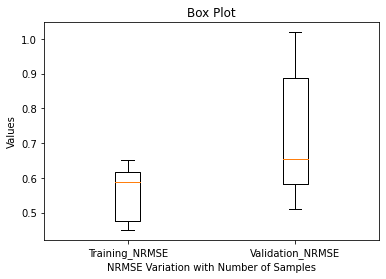

[0.47182378 0.62020302 0.47386167 0.62299735 0.57169915 0.60696008
 0.60259182 0.48115816 0.44978422 0.65171452]
[1.01927309 0.53413138 0.50957431 0.75090571 0.60294769 0.93426448
 0.93924726 0.57854379 0.59241897 0.70467722]


In [89]:
# we begin by creating empty arrays to store results for the Box Plots
Training_NRMSE = np.empty(11)
Validation_NRMSE = np.empty(11)
i=1
while(i<11):
    # setting a new random seed for every iteration 
    np.random.seed(5*i)

    # generate random training data from previously defined functions
    Training_X = Random_Data_Matrix(20*i,9)
    w = np.random.normal(0,1,Training_X.shape[1])
    Training_t = Target(Training_X, w, w0=0.5, Var=0.4)
    x0=np.ones(Training_X.shape[0])
    Training_X1 = np.column_stack((x0, Training_X))
    
    # similarly generate validation data from previously defined functions
    Validation_X = Random_Data_Matrix(5*i,9)
    #w = np.random.normal(0,1,Validation_X.shape[1])
    Validation_t = Target(Validation_X, w, w0=0.05, Var=0.14)
    x0=np.ones(Validation_X.shape[0])
    Validation_X1 = np.column_stack((x0, Validation_X))

    # in both training & validation the number of samples is a function of i

    # now we call the pseudo inverse fn by passing the required variables
    w, T_MSE, y = LR_Weights_Pseudo_Inverse(Training_X1, Training_t, l=0.03)

    # the training NRMSE can be found from the training_MSE
    # & is stored in the array
    Training_NRMSE[i]=np.sqrt(T_MSE)/np.std(Training_t)

    # weight vector w is now used to compute the target y for the validation set
    y=Validation_X1@w
    V_MSE=Mean_Square_Error(y,Validation_t)

    # the validation NMRSE is computed and also stored in the array 
    Validation_NRMSE[i]=np.sqrt(V_MSE)/np.std(Validation_t)
    i=i+1

# now the box plot can be plotted with values from 'Training_NRMSE', 'Validation_NRMSE'
fig, ax = plt.subplots()

bp = ax.boxplot([Training_NRMSE[1:], Validation_NRMSE[1:]], labels=['Training_NRMSE', 'Validation_NRMSE'])

# below the title for the box plot is set
ax.set_title('Box Plot')
ax.set_xlabel('NRMSE Variation with Number of Samples')
ax.set_ylabel('Values')

plt.show()
print(Training_NRMSE[1:])
print(Validation_NRMSE[1:])
# it can be observed that the validtion NRMSE shows more variation compared to the Training NRMSE
# also as the number of the samples is increased the validation NRMSE is reduced

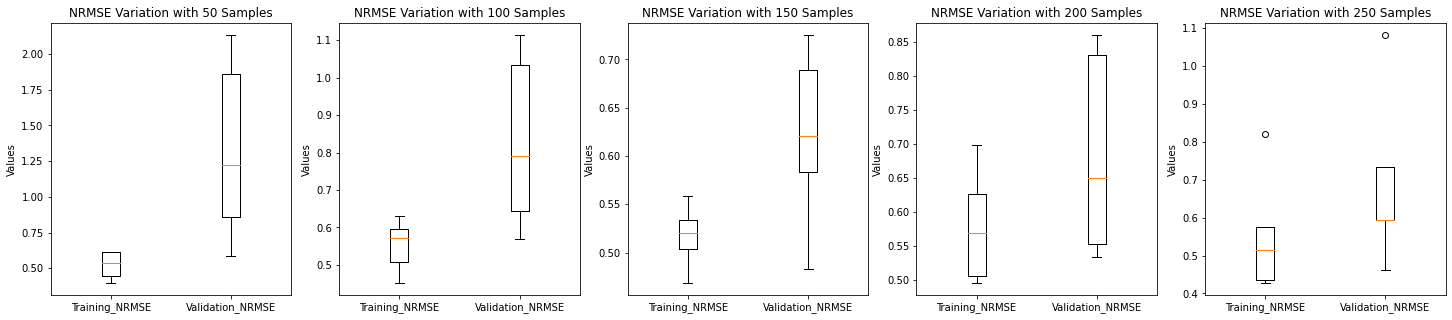

[[0.5395845661344929, 0.6138948129745745, 0.6136005958325242, 0.4428358865957787, 0.3996651414493778], [0.45277872353343546, 0.6292993979002681, 0.5088099343602533, 0.5955823476541231, 0.5716991546992737], [0.50381648597569, 0.5201997852397005, 0.5586465777587059, 0.46900895496271805, 0.5334813153095656], [0.6977954484767739, 0.6265495013787494, 0.5687226133986291, 0.49576054649222984, 0.5056331962191165], [0.42890396983582046, 0.5143818365201357, 0.8217073813023646, 0.4357294998622166, 0.5749505636607974]]
[[1.8620454787155607, 1.2233501869405203, 2.129842004587507, 0.8606858336964637, 0.5878823235360825], [1.0344277620581739, 0.5680942251084815, 0.6429559778623292, 1.112761908265844, 0.7898515446857957], [0.6889844361951688, 0.5831443255773369, 0.6204489719812268, 0.4835370195456946, 0.7248673807653101], [0.8305769622572765, 0.6489615195450142, 0.8589019009756851, 0.5327768186611617, 0.5517999234407697], [0.5926774030151436, 0.5947207801956894, 1.0811831441573887, 0.4618592832680474,

In [90]:
# UPDATED FOR MULTIPLE PLOTS

# a) we begin by creating empty arrays to store results for the Box Plots
Training_NRMSE = []
Validation_NRMSE = []
i=50
while(i<300):
  j=0
  temp_train_nrmse=[]
  temp_val_nrmse=[]
  while(j<5):
        np.random.seed(21+j)
        # generate random training data from previously defined functions
        Training_X = Random_Data_Matrix(i,9)
        w = np.random.normal(0,1,Training_X.shape[1])
        Training_t = Target(Training_X, w, w0=0.5, Var=0.4)
        x0=np.ones(Training_X.shape[0])
        Training_X1 = np.column_stack((x0, Training_X))
        
        # similarly generate validation data from previously defined functions
        Validation_X = Random_Data_Matrix(i//5,9)
        #w = np.random.normal(0,1,Validation_X.shape[1])
        Validation_t = Target(Validation_X, w, w0=0.05, Var=0.14)
        x0=np.ones(Validation_X.shape[0])
        Validation_X1 = np.column_stack((x0, Validation_X))

        # in both training & validation the number of samples is a function of i

        # now we call the pseudo inverse fn by passing the required variables
        w, T_MSE, y = LR_Weights_Pseudo_Inverse(Training_X1, Training_t, l=0.03)

        # the training NRMSE can be found from the training_MSE
        # & is stored in the array
        temp_train_nrmse.append(np.sqrt(T_MSE)/np.std(Training_t))
        
        #Training_NRMSE[i]=np.sqrt(T_MSE)/np.std(Training_t)

        # weight vector w is now used to compute the target y for the validation set
        y=Validation_X1@w
        V_MSE=Mean_Square_Error(y,Validation_t)

        # the validation NMRSE is computed and also stored in the array 
        temp_val_nrmse.append(np.sqrt(V_MSE)/np.std(Validation_t))
        
        #Validation_NRMSE[i]=np.sqrt(V_MSE)/np.std(Validation_t)

        j=j+1
  Training_NRMSE.append(temp_train_nrmse)
  #print(Training_NRMSE)
  Validation_NRMSE.append(temp_val_nrmse)

  i=i+50
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5, figsize=(25, 5))

  # create a box plot with the values in the 'Training_NRMSE', 'Validation_NRMSE' lists
bp = ax1.boxplot([Training_NRMSE[0], Validation_NRMSE[0]], labels=['Training_NRMSE', 'Validation_NRMSE'])
ax1.set_title('NRMSE Variation with 50 Samples')
ax1.set_ylabel('Values')

bp = ax2.boxplot([Training_NRMSE[1], Validation_NRMSE[1]], labels=['Training_NRMSE', 'Validation_NRMSE'])
ax2.set_title('NRMSE Variation with 100 Samples')
ax2.set_ylabel('Values')

bp = ax3.boxplot([Training_NRMSE[2], Validation_NRMSE[2]], labels=['Training_NRMSE', 'Validation_NRMSE'])
ax3.set_title('NRMSE Variation with 150 Samples')
ax3.set_ylabel('Values')

bp = ax4.boxplot([Training_NRMSE[3], Validation_NRMSE[3]], labels=['Training_NRMSE', 'Validation_NRMSE'])
ax4.set_title('NRMSE Variation with 200 Samples')
ax4.set_ylabel('Values')

bp = ax5.boxplot([Training_NRMSE[4], Validation_NRMSE[4]], labels=['Training_NRMSE', 'Validation_NRMSE'])
ax5.set_title('NRMSE Variation with 250 Samples')
ax5.set_ylabel('Values')

# show the plots & lists of data
plt.show()
print(Training_NRMSE)
print(Validation_NRMSE)
# it can be observed that the validtion NRMSE shows more variation compared to the Training NRMSE

b) Training and validation NRMSE obtained using pseudo inverse with number of variables [2]

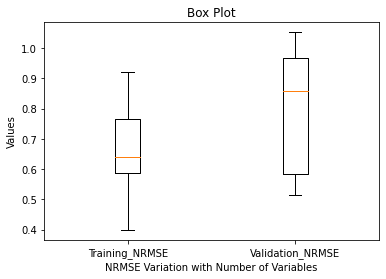

[0.78067577 0.92082142 0.72603114 0.60437487 0.84313789 0.58685916
 0.56165464 0.39869418 0.59042268 0.67328868]
[1.05269717 0.90630738 0.83552374 0.55106822 0.88480283 0.67828311
 0.9871781  0.51403437 0.54287502 1.03292987]


In [91]:
# we begin by creating empty arrays to store results for the Box Plots
Training_NRMSE = np.empty(11)
Validation_NRMSE = np.empty(11)
i=1
while(i<11):
    # setting a new random seed for every iteration 
    np.random.seed(5*i)

    # generate random training data from previously defined functions    
    Training_X = Random_Data_Matrix(100,i)
    w = np.random.normal(0,1,Training_X.shape[1])
    Training_t = Target(Training_X, w, w0=0.5, Var=0.4)
    x0=np.ones(Training_X.shape[0])
    Training_X1 = np.column_stack((x0, Training_X))

    # similarly generate validation data from previously defined functions
    Validation_X = Random_Data_Matrix(10,i)
    #w = np.random.normal(0,1,Validation_X.shape[1])
    Validation_t = Target(Validation_X, w, w0=0.5, Var=0.4)
    x0=np.ones(Validation_X.shape[0])
    Validation_X1 = np.column_stack((x0, Validation_X))
    
    # in both training & validation the number of Variables is a function of i
    # now we call the pseudo inverse fn by passing the required variables
    w, T_MSE, y = LR_Weights_Pseudo_Inverse(Training_X1, Training_t, l=0.3)
    
    Training_NRMSE[i]=np.sqrt(T_MSE)/np.std(Training_t)
    # the training NRMSE can be found from the training_MSE
    # & is stored in the array
    
    # weight vector w is now used to compute the target y for the validation set
    y=Validation_X1@w
    V_MSE=Mean_Square_Error(y,Validation_t)

    # the validation NMRSE is computed and also stored in the array 
    Validation_NRMSE[i]=np.sqrt(V_MSE)/np.std(Validation_t)
    i=i+1


# now the box plot can be plotted with values from 'Training_NRMSE', 'Validation_NRMSE'
fig, ax = plt.subplots()

bp = ax.boxplot([Training_NRMSE[1:], Validation_NRMSE[1:]], labels=['Training_NRMSE', 'Validation_NRMSE'])

# below the title for the box plot is set
ax.set_title('Box Plot')
ax.set_xlabel('NRMSE Variation with Number of Variables')
ax.set_ylabel('Values')

plt.show()
print(Training_NRMSE[1:])
print(Validation_NRMSE[1:])
# it can be observed that the validtion NRMSE shows more variation compared to the Training NRMSE
# also as the number of the variables is increased the validation NRMSE is reduced

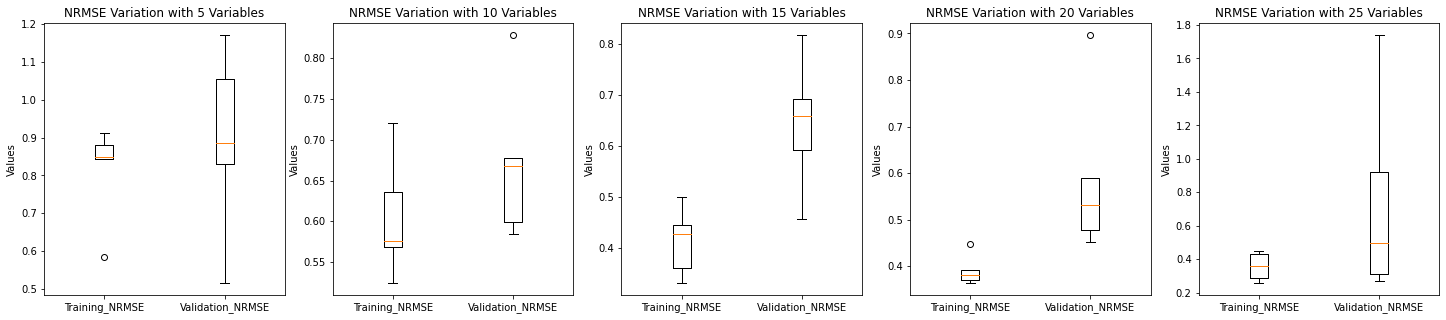

[[0.9121144244764671, 0.8808114991546511, 0.5853044327384821, 0.8481584831665477, 0.8431378854567925], [0.7200391507596812, 0.5679409313681589, 0.5761018497505942, 0.5249705926352293, 0.6353782076918025], [0.44619595490719294, 0.3616857317895552, 0.3330785277145968, 0.4276246682249063, 0.5005156543933991], [0.3706132633126197, 0.3651736520417574, 0.3807098198306164, 0.4487652659532012, 0.39143829517519274], [0.3620296650434865, 0.42917678396656467, 0.26114612880054466, 0.28858659562301975, 0.44669282558335666]]
[[1.0535462420902515, 1.1695861408960597, 0.5174342634762279, 0.8293962499160847, 0.8848028333588581], [0.5842418947740292, 0.827828979070707, 0.5987121176448486, 0.6775031197222043, 0.6677502272751291], [0.657798228574319, 0.5916808017407719, 0.8161689469448843, 0.45747269969552934, 0.6925069270681238], [0.47875565116721686, 0.8956296214651388, 0.5892223236137251, 0.45170228545732644, 0.531893126273008], [0.3119324859413496, 0.919097799390786, 0.26737750710208535, 0.49993791024

In [92]:
# UPDATED FOR MULTIPLE PLOTS

# we begin by creating empty arrays to store results for the Box Plots
Training_NRMSE = []
Validation_NRMSE = []
i=5 #features
while(i<30):  # upto 25 features
  j=0
  temp_train_nrmse=[]
  temp_val_nrmse=[]
  while(j<5):
    np.random.seed(21+j)
    # generate random training data from previously defined functions    
    Training_X = Random_Data_Matrix(100,i)
    w = np.random.normal(0,1,Training_X.shape[1])
    Training_t = Target(Training_X, w, w0=0.5, Var=0.4)
    x0=np.ones(Training_X.shape[0])
    Training_X1 = np.column_stack((x0, Training_X))

    # similarly generate validation data from previously defined functions
    Validation_X = Random_Data_Matrix(10,i)
    #w = np.random.normal(0,1,Validation_X.shape[1])
    Validation_t = Target(Validation_X, w, w0=0.5, Var=0.4)
    x0=np.ones(Validation_X.shape[0])
    Validation_X1 = np.column_stack((x0, Validation_X))
    
    # in both training & validation the number of Variables is a function of i
    # now we call the pseudo inverse fn by passing the required variables
    w, T_MSE, y = LR_Weights_Pseudo_Inverse(Training_X1, Training_t, l=0.3)
    
    temp_train_nrmse.append(np.sqrt(T_MSE)/np.std(Training_t))
    
    #Training_NRMSE[i]=np.sqrt(T_MSE)/np.std(Training_t)
    # the training NRMSE can be found from the training_MSE
    # & is stored in the array
    
    # weight vector w is now used to compute the target y for the validation set
    y=Validation_X1@w
    V_MSE=Mean_Square_Error(y,Validation_t)

    # the validation NMRSE is computed and also stored in the array 
    temp_val_nrmse.append(np.sqrt(V_MSE)/np.std(Validation_t))
    #Validation_NRMSE[i]=np.sqrt(V_MSE)/np.std(Validation_t)
    j=j+1
  Training_NRMSE.append(temp_train_nrmse)
  #print(Training_NRMSE)
  Validation_NRMSE.append(temp_val_nrmse)
  i=i+5
# now the box plot can be plotted with values from 'Training_NRMSE', 'Validation_NRMSE'
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5, figsize=(25, 5))

  # create a box plot with the values in the 'Training_NRMSE', 'Validation_NRMSE' lists
bp = ax1.boxplot([Training_NRMSE[0], Validation_NRMSE[0]], labels=['Training_NRMSE', 'Validation_NRMSE'])
ax1.set_title('NRMSE Variation with 5 Variables')
ax1.set_ylabel('Values')

bp = ax2.boxplot([Training_NRMSE[1], Validation_NRMSE[1]], labels=['Training_NRMSE', 'Validation_NRMSE'])
ax2.set_title('NRMSE Variation with 10 Variables')
ax2.set_ylabel('Values')

bp = ax3.boxplot([Training_NRMSE[2], Validation_NRMSE[2]], labels=['Training_NRMSE', 'Validation_NRMSE'])
ax3.set_title('NRMSE Variation with 15 Variables')
ax3.set_ylabel('Values')

bp = ax4.boxplot([Training_NRMSE[3], Validation_NRMSE[3]], labels=['Training_NRMSE', 'Validation_NRMSE'])
ax4.set_title('NRMSE Variation with 20 Variables')
ax4.set_ylabel('Values')

bp = ax5.boxplot([Training_NRMSE[4], Validation_NRMSE[4]], labels=['Training_NRMSE', 'Validation_NRMSE'])
ax5.set_title('NRMSE Variation with 25 Variables')
ax5.set_ylabel('Values')

# show the plots & lists of data
plt.show()
print(Training_NRMSE)
print(Validation_NRMSE)
# it can be observed that the validtion NRMSE shows more variation compared to the Training NRMSE


c) Training and validation NRMSE obtained using pseudo inverse with noise variance 

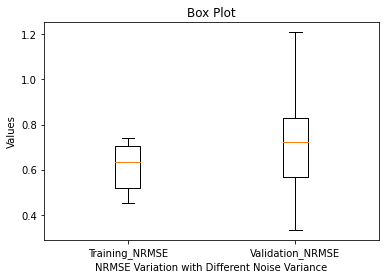

[0.45227876 0.49328162 0.47349473 0.67915066 0.61321213 0.5890865
 0.65241683 0.74217692 0.72400606 0.71040867]
[0.50199912 0.33249813 0.70065783 0.74586938 0.56359973 1.20841407
 0.83537005 1.07898997 0.8079923  0.58161824]


In [93]:
# we begin by creating empty arrays to store results for the Box Plots
Training_NRMSE = np.empty(11)
Validation_NRMSE = np.empty(11)
i=1
while(i<11):
    # setting a new random seed for every iteration 
    np.random.seed(5*i)
    
    # generate random training data from previously defined functions    
    Training_X = Random_Data_Matrix(100,9)
    w = np.random.normal(0,1,Training_X.shape[1])
    Training_t = Target(Training_X, w, w0=0.5, Var=0.1*i)
    x0=np.ones(Training_X.shape[0])
    Training_X1=np.column_stack((x0, Training_X))

    # similarly generate validation data from previously defined functions
    Validation_X = Random_Data_Matrix(10,9)
    #w = np.random.normal(0,1,Validation_X.shape[1])
    Validation_t = Target(Validation_X, w, w0=0.5, Var=0.1*i)
    x0=np.ones(Validation_X.shape[0])
    Validation_X1 = np.column_stack((x0, Validation_X))
    # in both training & validation noise variance is a function of i
    w, T_MSE, y = LR_Weights_Pseudo_Inverse(Training_X1, Training_t, l=0.3)
    # now we call the pseudo inverse fn by passing the required variables
    # the training NRMSE can be found from the training_MSE
    # & is stored in the array    
    Training_NRMSE[i]=np.sqrt(T_MSE)/np.std(Training_t)
    # weight vector w is now used to compute the target y for the validation set
    y=Validation_X1@w
    # the validation NMRSE is computed and also stored in the array 
    V_MSE=Mean_Square_Error(y,Validation_t)

    Validation_NRMSE[i]=np.sqrt(V_MSE)/np.std(Validation_t)
    i=i+1

fig, ax = plt.subplots()

# now the box plot can be plotted with values from 'Training_NRMSE', 'Validation_NRMSE'
bp = ax.boxplot([Training_NRMSE[1:], Validation_NRMSE[1:]], labels=['Training_NRMSE', 'Validation_NRMSE'])

# below the title for the box plot is set    
ax.set_title('Box Plot')
ax.set_xlabel('NRMSE Variation with Different Noise Variance')
ax.set_ylabel('Values')

plt.show()
print(Training_NRMSE[1:])
print(Validation_NRMSE[1:])
# it can be observed that the validtion NRMSE shows more variation compared to the Training NRMSE
# also as the variance of noise is increased the validation NRMSE is reduced

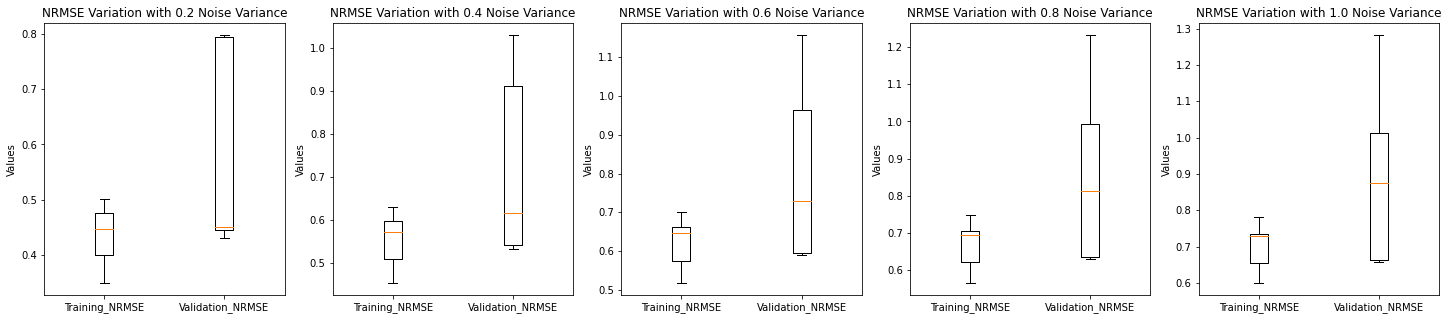

[[0.34991211825232066, 0.5016942146224334, 0.3996414445088005, 0.47608131527475867, 0.44771835908597113], [0.4542006879315715, 0.6298326491994315, 0.5099576648600446, 0.596221462612538, 0.572667663801679], [0.5193629026302349, 0.7012651225033022, 0.5755802615253824, 0.6624365221730967, 0.6456300502691916], [0.5656081625590196, 0.7477206704483723, 0.6204810595232886, 0.7051020529241286, 0.6945402721156426], [0.6006873071520468, 0.7805844780160408, 0.6535780752210338, 0.7350543990842562, 0.729887244105404]]
[[0.44459547032806657, 0.7972602440080326, 0.7943269217302166, 0.4501655543822754, 0.43016321224070286], [0.6152611598258244, 0.911593520980289, 1.0291094384605353, 0.5421271685171023, 0.5312847779570357], [0.7293753327054106, 0.96304874690887, 1.155365537571602, 0.5963557440904019, 0.589439905021898], [0.8124603120044166, 0.9926663862562038, 1.2318553877360576, 0.63420820801219, 0.6286767082517886], [0.875688396380449, 1.0120270667244058, 1.281697234249295, 0.6629203827126925, 0.6574

In [94]:
#UPDATED FOR MULTIPLE PLOTS

# we begin by creating empty arrays to store results for the Box Plots
Training_NRMSE = []
Validation_NRMSE = []
i=2 #
while(i<11):  
  j=0
  temp_train_nrmse=[]
  temp_val_nrmse=[]
  while(j<5):
    np.random.seed(21+j)
    # generate random training data from previously defined functions    
    Training_X = Random_Data_Matrix(100,9)
    w = np.random.normal(0,1,Training_X.shape[1])
    Training_t = Target(Training_X, w, w0=0.5, Var=0.1*i)
    x0=np.ones(Training_X.shape[0])
    Training_X1=np.column_stack((x0, Training_X))

    # similarly generate validation data from previously defined functions
    Validation_X = Random_Data_Matrix(10,9)
    #w = np.random.normal(0,1,Validation_X.shape[1])
    Validation_t = Target(Validation_X, w, w0=0.5, Var=0.1*i)
    x0=np.ones(Validation_X.shape[0])
    Validation_X1 = np.column_stack((x0, Validation_X))
    # in both training & validation noise variance is a function of i
    w, T_MSE, y = LR_Weights_Pseudo_Inverse(Training_X1, Training_t, l=0.3)
    # now we call the pseudo inverse fn by passing the required variables
    # the training NRMSE can be found from the training_MSE
    # & is stored in the array    
    
    temp_train_nrmse.append(np.sqrt(T_MSE)/np.std(Training_t))
    #Training_NRMSE[i]=np.sqrt(T_MSE)/np.std(Training_t)
    # weight vector w is now used to compute the target y for the validation set
    y=Validation_X1@w
    # the validation NMRSE is computed and also stored in the array 
    V_MSE=Mean_Square_Error(y,Validation_t)

    temp_val_nrmse.append(np.sqrt(V_MSE)/np.std(Validation_t))
    #Validation_NRMSE[i]=np.sqrt(V_MSE)/np.std(Validation_t)
    j=j+1
  Training_NRMSE.append(temp_train_nrmse)
  #print(Training_NRMSE)
  Validation_NRMSE.append(temp_val_nrmse)
  i=i+2
# now the box plot can be plotted with values from 'Training_NRMSE', 'Validation_NRMSE'
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5, figsize=(25, 5))

# create a box plot with the values in the 'Training_NRMSE', 'Validation_NRMSE' lists
bp = ax1.boxplot([Training_NRMSE[0], Validation_NRMSE[0]], labels=['Training_NRMSE', 'Validation_NRMSE'])
ax1.set_title('NRMSE Variation with 0.2 Noise Variance')
ax1.set_ylabel('Values')

bp = ax2.boxplot([Training_NRMSE[1], Validation_NRMSE[1]], labels=['Training_NRMSE', 'Validation_NRMSE'])
ax2.set_title('NRMSE Variation with 0.4 Noise Variance')
ax2.set_ylabel('Values')

bp = ax3.boxplot([Training_NRMSE[2], Validation_NRMSE[2]], labels=['Training_NRMSE', 'Validation_NRMSE'])
ax3.set_title('NRMSE Variation with 0.6 Noise Variance')
ax3.set_ylabel('Values')

bp = ax4.boxplot([Training_NRMSE[3], Validation_NRMSE[3]], labels=['Training_NRMSE', 'Validation_NRMSE'])
ax4.set_title('NRMSE Variation with 0.8 Noise Variance')
ax4.set_ylabel('Values')

bp = ax5.boxplot([Training_NRMSE[4], Validation_NRMSE[4]], labels=['Training_NRMSE', 'Validation_NRMSE'])
ax5.set_title('NRMSE Variation with 1.0 Noise Variance')
ax5.set_ylabel('Values')

# show the plots & lists of data
plt.show()
print(Training_NRMSE)
print(Validation_NRMSE)
# it can be observed that the validtion NRMSE shows more variation compared to the Training NRMSE
# also as the value of lambda2 is increased, the number of nearly zero weights also increases

d) Training and validation NRMSE obtained using pseudo inverse with w0

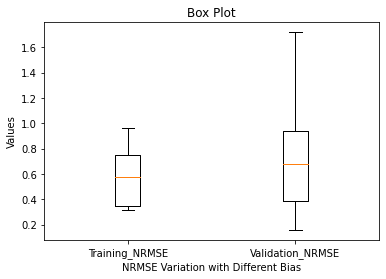

[0.31392549 0.31363868 0.31738602 0.54794972 0.44060789 0.60297255
 0.67097415 0.96338965 0.7713565  0.81424965]
[0.34560174 0.15751488 0.50061562 0.9459451  0.3081829  0.92099697
 1.66090033 1.7183784  0.72465583 0.63916083]


In [95]:
# we begin by creating empty arrays to store results for the Box Plots
Training_NRMSE = np.empty(11)
Validation_NRMSE = np.empty(11)
i=1
while(i<11):
    # setting a new random seed for every iteration     
    np.random.seed(5*i)
    # generate random training data from previously defined functions    
    Training_X = Random_Data_Matrix(100,9)
    w = np.random.normal(0,1,Training_X.shape[1])
    Training_t = Target(Training_X, w, w0=5*i, Var=0.04)
    x0=np.ones(Training_X.shape[0])
    Training_X1=np.column_stack((x0, Training_X))
    # similarly generate validation data from previously defined functions
    Validation_X = Random_Data_Matrix(10,9)
    #w = np.random.normal(0,1,Validation_X.shape[1])
    Validation_t = Target(Validation_X, w, w0=5*i, Var=0.04)
    x0=np.ones(Validation_X.shape[0])
    Validation_X1 = np.column_stack((x0, Validation_X))
    # in both training & validation the bias w0 is a function of i
    w, T_MSE, y = LR_Weights_Pseudo_Inverse(Training_X1, Training_t, l=0.3)
    # now we call the pseudo inverse fn by passing the required variables
    Training_NRMSE[i]=np.sqrt(T_MSE)/np.std(Training_t)
    # the training NRMSE can be found from the training_MSE
    # & is stored in the array    
    y=Validation_X1@w
    # weight vector w is now used to compute the target y for the validation set
    # the validation NMRSE is computed and also stored in the array 
    V_MSE=Mean_Square_Error(y,Validation_t)

    Validation_NRMSE[i]=np.sqrt(V_MSE)/np.std(Validation_t)
    i=i+1

fig, ax = plt.subplots()

# now the box plot can be plotted with values from 'Training_NRMSE', 'Validation_NRMSE'
bp = ax.boxplot([Training_NRMSE[1:], Validation_NRMSE[1:]], labels=['Training_NRMSE', 'Validation_NRMSE'])

# below the title for the box plot is set
ax.set_title('Box Plot')
ax.set_xlabel('NRMSE Variation with Different Bias')
ax.set_ylabel('Values')

plt.show()
print(Training_NRMSE[1:])
print(Validation_NRMSE[1:])
# it can be observed that the validtion NRMSE shows more variation compared to the Training NRMSE

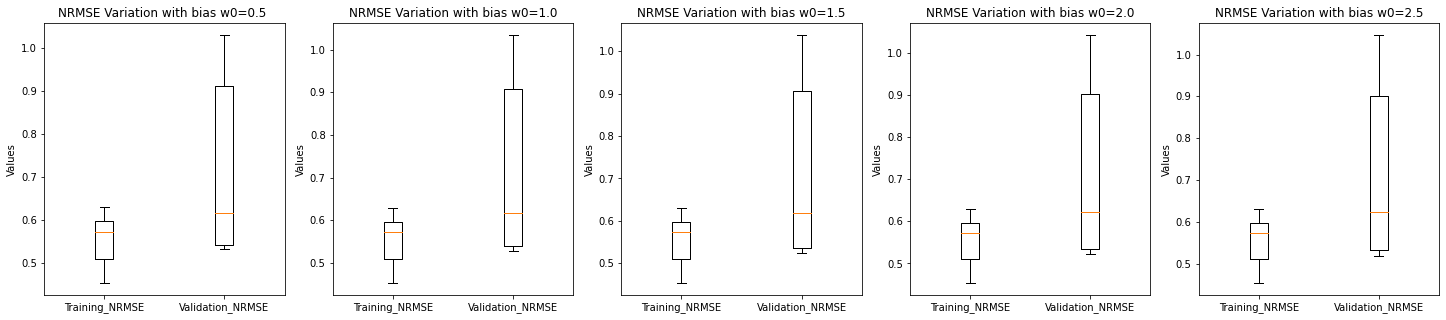

[[0.4542006879315715, 0.6298326491994315, 0.5099576648600446, 0.596221462612538, 0.572667663801679], [0.45426460224214044, 0.6297287723391392, 0.5102485706248658, 0.5962139220631045, 0.5726666617674522], [0.4544113829107268, 0.629708086330913, 0.5106183656038061, 0.5962935202867545, 0.5727376876600969], [0.45464094967721524, 0.629770599372437, 0.5110668785502148, 0.5964602223972154, 0.5728807146894933], [0.4549531772214515, 0.6299162866936309, 0.5115939024286668, 0.5967139553926705, 0.5730956889478466]]
[[0.6152611598258244, 0.911593520980289, 1.0291094384605353, 0.5421271685171023, 0.5312847779570357], [0.6173786386006466, 0.9085579816453999, 1.0330483733227243, 0.5394621596459525, 0.5280600919541515], [0.6195550508720137, 0.9055800993488824, 1.0371177943699816, 0.5368560259019088, 0.5248749685179165], [0.6217897777964234, 0.902660444723678, 1.0413161717993935, 0.5343096287887001, 0.5217301322283661], [0.6240821929311035, 0.8997995845784834, 1.0456419522862475, 0.531823826372284, 0.51

In [96]:
# UPDATED for multiple plots

# we begin by creating empty arrays to store results for the Box Plots
Training_NRMSE = []
Validation_NRMSE = []
i=1 #
while(i<6):  
  j=0
  temp_train_nrmse=[]
  temp_val_nrmse=[]
  while(j<5):
    np.random.seed(21+j)
    # generate random training data from previously defined functions    
    Training_X = Random_Data_Matrix(100,9)
    w = np.random.normal(0,1,Training_X.shape[1])
    Training_t = Target(Training_X, w, w0=0.5*i, Var=0.4)
    x0=np.ones(Training_X.shape[0])
    Training_X1=np.column_stack((x0, Training_X))
    # similarly generate validation data from previously defined functions
    Validation_X = Random_Data_Matrix(10,9)
    #w = np.random.normal(0,1,Validation_X.shape[1])
    Validation_t = Target(Validation_X, w, w0=0.5*i, Var=0.4)
    x0=np.ones(Validation_X.shape[0])
    Validation_X1 = np.column_stack((x0, Validation_X))
    # in both training & validation the bias w0 is a function of i
    w, T_MSE, y = LR_Weights_Pseudo_Inverse(Training_X1, Training_t, l=0.3)
    # now we call the pseudo inverse fn by passing the required variables
    
    temp_train_nrmse.append(np.sqrt(T_MSE)/np.std(Training_t))
    #Training_NRMSE[i]=np.sqrt(T_MSE)/np.std(Training_t)
    # weight vector w is now used to compute the target y for the validation set
    y=Validation_X1@w
    # the validation NMRSE is computed and also stored in the array 
    V_MSE=Mean_Square_Error(y,Validation_t)

    temp_val_nrmse.append(np.sqrt(V_MSE)/np.std(Validation_t))
    #Validation_NRMSE[i]=np.sqrt(V_MSE)/np.std(Validation_t)
    j=j+1
  Training_NRMSE.append(temp_train_nrmse)
  #print(Training_NRMSE)
  Validation_NRMSE.append(temp_val_nrmse)
  i=i+1
# now the box plot can be plotted with values from 'Training_NRMSE', 'Validation_NRMSE'
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5, figsize=(25, 5))

# create a box plot with the values in the 'Training_NRMSE', 'Validation_NRMSE' lists
bp = ax1.boxplot([Training_NRMSE[0], Validation_NRMSE[0]], labels=['Training_NRMSE', 'Validation_NRMSE'])
ax1.set_title('NRMSE Variation with bias w0=0.5 ')
ax1.set_ylabel('Values')

bp = ax2.boxplot([Training_NRMSE[1], Validation_NRMSE[1]], labels=['Training_NRMSE', 'Validation_NRMSE'])
ax2.set_title('NRMSE Variation with bias w0=1.0')
ax2.set_ylabel('Values')

bp = ax3.boxplot([Training_NRMSE[2], Validation_NRMSE[2]], labels=['Training_NRMSE', 'Validation_NRMSE'])
ax3.set_title('NRMSE Variation with bias w0=1.5')
ax3.set_ylabel('Values')

bp = ax4.boxplot([Training_NRMSE[3], Validation_NRMSE[3]], labels=['Training_NRMSE', 'Validation_NRMSE'])
ax4.set_title('NRMSE Variation with bias w0=2.0')
ax4.set_ylabel('Values')

bp = ax5.boxplot([Training_NRMSE[4], Validation_NRMSE[4]], labels=['Training_NRMSE', 'Validation_NRMSE'])
ax5.set_title('NRMSE Variation with bias w0=2.5')
ax5.set_ylabel('Values')

# show the plots & lists of data
plt.show()
print(Training_NRMSE)
print(Validation_NRMSE)
# it can be observed that the validtion NRMSE shows more variation compared to the Training NRMSE

e) Training and validation NRMSE obtained using pseudo inverse with lambda2 

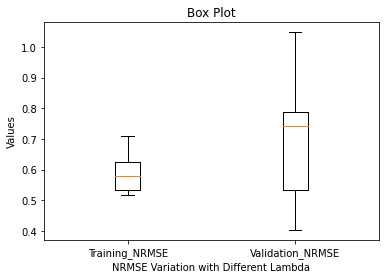

[0.70917243 0.62448686 0.52521346 0.67875295 0.5716961  0.5178923
 0.55627275 0.62649126 0.58954245 0.52521481]
[0.78999706 0.43719742 0.74882115 0.73500401 0.52298289 1.00503567
 0.78507049 1.04808826 0.56796811 0.40321096]


In [97]:
# we begin by creating empty arrays to store results for the Box Plots
Training_NRMSE = np.empty(11)
Validation_NRMSE = np.empty(11)
i=1
while(i<11):
    # setting a new random seed for every iteration     
    np.random.seed(5*i)
    # generate random training data from previously defined functions    
    Training_X = Random_Data_Matrix(100,9)
    w = np.random.normal(0,1,Training_X.shape[1])
    Training_t = Target(Training_X, w, w0=0.3, Var=0.4)
    x0=np.ones(Training_X.shape[0])
    Training_X1=np.column_stack((x0, Training_X))
    # similarly generate validation data from previously defined functions
    Validation_X = Random_Data_Matrix(10,9)
    #w = np.random.normal(0,1,Validation_X.shape[1])
    Validation_t = Target(Validation_X, w, w0=0.3, Var=0.4)
    x0=np.ones(Validation_X.shape[0])
    Validation_X1 = np.column_stack((x0, Validation_X))
    # in both training & validation the regularisation rate lambda2 is a function of i
    w, T_MSE, y = LR_Weights_Pseudo_Inverse(Training_X1, Training_t, l=0.005*i)
    # now we call the pseudo inverse fn by passing the required variables
    # the training NRMSE can be found from the training_MSE
    # & is stored in the array    
    Training_NRMSE[i]=np.sqrt(T_MSE)/np.std(Training_t)
    # weight vector w is now used to compute the target y for the validation set
    y=Validation_X1@w
    V_MSE=Mean_Square_Error(y,Validation_t)
    # the validation NMRSE is computed and also stored in the array 
    Validation_NRMSE[i]=np.sqrt(V_MSE)/np.std(Validation_t)
    i=i+1

fig, ax = plt.subplots()

# now the box plot can be plotted with values from 'Training_NRMSE', 'Validation_NRMSE'
bp = ax.boxplot([Training_NRMSE[1:], Validation_NRMSE[1:]], labels=['Training_NRMSE', 'Validation_NRMSE'])

# below the title for the box plot is set
ax.set_title('Box Plot')
ax.set_xlabel('NRMSE Variation with Different Lambda')
ax.set_ylabel('Values')

plt.show()
print(Training_NRMSE[1:])
print(Validation_NRMSE[1:])
# it can be observed that the validtion NRMSE shows more variation compared to the Training NRMSE

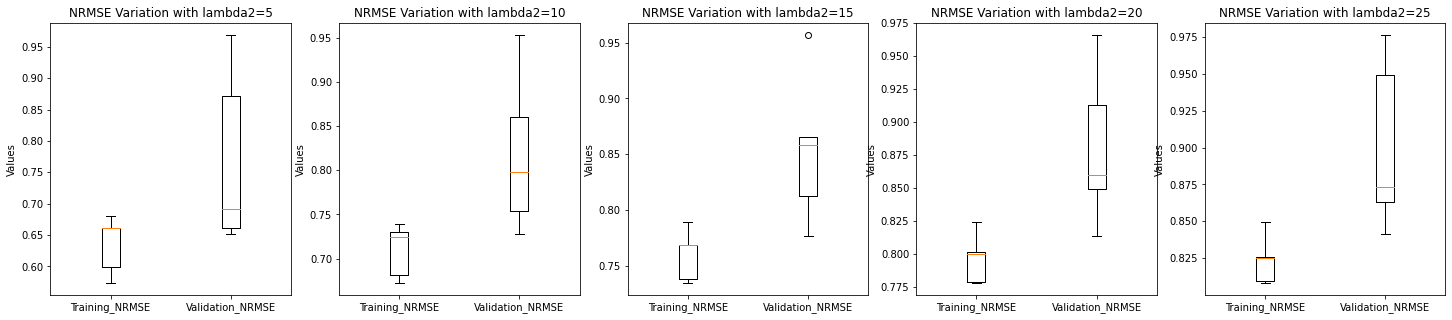

[[0.5743322353309295, 0.6796230221601887, 0.5983660838219472, 0.6609530376050434, 0.6615440656165112], [0.6729406862904597, 0.7305528085449486, 0.681704154094091, 0.7246605968775269, 0.7393754865784148], [0.7352451450593385, 0.7691896189915848, 0.7386289780559141, 0.76905144025021, 0.7896220936230492], [0.7780251156914192, 0.7996607189575596, 0.7788004585125331, 0.8012121749528455, 0.8242760866728621], [0.8096047643039254, 0.8250166716902219, 0.8084366650148133, 0.8258056986887797, 0.8498106833583144]]
[[0.6615824319245265, 0.8712265263363311, 0.968283437612533, 0.6513892116300575, 0.6921740432607297], [0.7542046613511724, 0.8603852624895257, 0.9526501581630831, 0.7274130869487301, 0.7984225662717253], [0.812459644508555, 0.8582934534397714, 0.9563989815212127, 0.7773192519359445, 0.8658119437812798], [0.8493012096314198, 0.8595930103370316, 0.9656911776126179, 0.8134088881591434, 0.913110158271086], [0.8735673004143748, 0.8629664286652169, 0.9760551613636542, 0.8414884761161291, 0.948

In [111]:
# updated for multiple plots

# we begin by creating empty arrays to store results for the Box Plots
Training_NRMSE = []
Validation_NRMSE = []
i=10 #
while(i<60):  
  j=0
  temp_train_nrmse=[]
  temp_val_nrmse=[]
  while(j<5):
    np.random.seed(21+j)
    # generate random training data from previously defined functions    
    Training_X = Random_Data_Matrix(100,9)
    w = np.random.normal(0,1,Training_X.shape[1])
    Training_t = Target(Training_X, w, w0=0.3, Var=0.4)
    x0=np.ones(Training_X.shape[0])
    Training_X1=np.column_stack((x0, Training_X))
    # similarly generate validation data from previously defined functions
    Validation_X = Random_Data_Matrix(10,9)
    #w = np.random.normal(0,1,Validation_X.shape[1])
    Validation_t = Target(Validation_X, w, w0=0.3, Var=0.4)
    x0=np.ones(Validation_X.shape[0])
    Validation_X1 = np.column_stack((x0, Validation_X))
    # in both training & validation the regularisation rate lambda2 is a function of i
    w, T_MSE, y = LR_Weights_Pseudo_Inverse(Training_X1, Training_t, l=0.5*i)
    # now we call the pseudo inverse fn by passing the required variables
    # the training NRMSE can be found from the training_MSE
    # & is stored in the array    
    
    temp_train_nrmse.append(np.sqrt(T_MSE)/np.std(Training_t))
    #Training_NRMSE[i]=np.sqrt(T_MSE)/np.std(Training_t)
    # weight vector w is now used to compute the target y for the validation set
    y=Validation_X1@w
    # the validation NMRSE is computed and also stored in the array 
    V_MSE=Mean_Square_Error(y,Validation_t)

    temp_val_nrmse.append(np.sqrt(V_MSE)/np.std(Validation_t))
    #Validation_NRMSE[i]=np.sqrt(V_MSE)/np.std(Validation_t)
    j=j+1
  Training_NRMSE.append(temp_train_nrmse)
  #print(Training_NRMSE)
  Validation_NRMSE.append(temp_val_nrmse)
  i=i+10
# now the box plot can be plotted with values from 'Training_NRMSE', 'Validation_NRMSE'
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5, figsize=(25, 5))

# create a box plot with the values in the 'Training_NRMSE', 'Validation_NRMSE' lists
bp = ax1.boxplot([Training_NRMSE[0], Validation_NRMSE[0]], labels=['Training_NRMSE', 'Validation_NRMSE'])
ax1.set_title('NRMSE Variation with lambda2=5')
ax1.set_ylabel('Values')

bp = ax2.boxplot([Training_NRMSE[1], Validation_NRMSE[1]], labels=['Training_NRMSE', 'Validation_NRMSE'])
ax2.set_title('NRMSE Variation with lambda2=10')
ax2.set_ylabel('Values')

bp = ax3.boxplot([Training_NRMSE[2], Validation_NRMSE[2]], labels=['Training_NRMSE', 'Validation_NRMSE'])
ax3.set_title('NRMSE Variation with lambda2=15')
ax3.set_ylabel('Values')

bp = ax4.boxplot([Training_NRMSE[3], Validation_NRMSE[3]], labels=['Training_NRMSE', 'Validation_NRMSE'])
ax4.set_title('NRMSE Variation with lambda2=20')
ax4.set_ylabel('Values')

bp = ax5.boxplot([Training_NRMSE[4], Validation_NRMSE[4]], labels=['Training_NRMSE', 'Validation_NRMSE'])
ax5.set_title('NRMSE Variation with lambda2=25')
ax5.set_ylabel('Values')

# show the plots & lists of data
plt.show()
print(Training_NRMSE)
print(Validation_NRMSE)
# it can be observed that the validtion NRMSE shows more variation compared to the Training NRMSE

f) Time taken to solve pseudo inverse with number of samples and number of variables and its breaking points

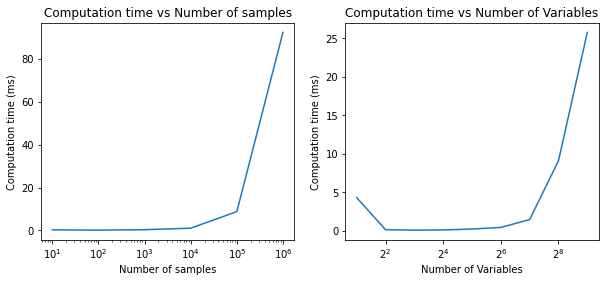

[10, 100, 1000, 10000, 100000, 1000000]
[0.23818016052246094, 0.1289844512939453, 0.33283233642578125, 1.027822494506836, 8.760452270507812, 92.30923652648926]
[2, 4, 8, 16, 32, 64, 128, 256, 512]
[4.305601119995117, 0.14400482177734375, 0.09179115295410156, 0.110626220703125, 0.23365020751953125, 0.4363059997558594, 1.4569759368896484, 9.082555770874023, 25.736331939697266]


In [99]:
# importing the time library
from time import time
# setting a random seed
np.random.seed(21)
# creating lists to store no of samples & corresponding time taken 
Sample_Time_List = []
Sample_List = [10, 100, 1000, 10000, 100000,1000000]
i=10
while(i<1000001):
    # generate training data matrix & target vector
    Training_X = Random_Data_Matrix(i,9)
    w = np.random.normal(0,1,Training_X.shape[1])
    Training_t = Target(Training_X, w, w0=0.5, Var=0.4)
    x0=np.ones(Training_X.shape[0])
    Training_X1 = np.column_stack((x0, Training_X))
    
    # store starting time
    start_time = time()
    w, T_MSE, y = LR_Weights_Pseudo_Inverse(Training_X1, Training_t, l=0.3)
    # append the time diff in the list
    Sample_Time_List.append((time() - start_time)*10**3)
  
    i=i*10
# create 2 subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

# first subplot is bw samples & time taken on a log scale with base 10
ax1.plot(Sample_List, Sample_Time_List)
ax1.set_xscale('log')
ax1.set_xlabel('Number of samples')
ax1.set_ylabel('Computation time (ms)')
ax1.set_title('Computation time vs Number of samples')

# now the same is repeated by varying the no of variables
# begin by creating the lists to store the no of vars & te corresponding time taken
Variable_Time_List = []
Variable_List = [2, 4, 8, 16, 32, 64, 128,256,512]
i=2
while(i<1024):
  # generate training data matrix & target vector
    Training_X = Random_Data_Matrix(100,i)
    w = np.random.normal(0,1,Training_X.shape[1])
    Training_t = Target(Training_X, w, w0=0.5, Var=0.4)
    x0=np.ones(Training_X.shape[0])
    Training_X1 = np.column_stack((x0, Training_X))
    
    # note starting time
    start_time = time()
    # call the function
    w, T_MSE, y = LR_Weights_Pseudo_Inverse(Training_X1, Training_t, l=0.3)
    # append time diff in ms to the list
    Variable_Time_List.append((time() - start_time)*10**3)
  
    i=i*2

# second subplot is bw samples & time taken on a log scale of base 2
ax2.plot(Variable_List, Variable_Time_List)
ax2.set_xscale('log',basex=2)
ax2.set_xlabel('Number of Variables')
ax2.set_ylabel('Computation time (ms)')
ax2.set_title('Computation time vs Number of Variables')

# the plots & data lists can now be printed as follows
plt.show()
print(Sample_List)
print(Sample_Time_List)
print(Variable_List)
print(Variable_Time_List)

# it can be observed that as the no of samples/variables increases the computational requiremnts increase exponentially
# the RAM is exhausted for samples in excess of 1000000 where it reaches the breakpoint

g) Training and validation NRMSE obtained using gradient descent with max_iter: Keep w, noise_var, eta, epsilon fixed. Rest is like a

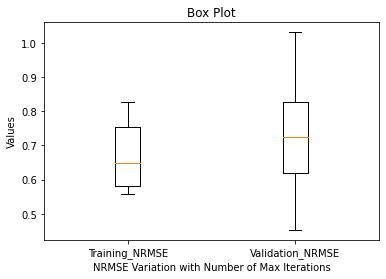

[0.78072477 0.82673892 0.79727917 0.57570893 0.67749912 0.56910915
 0.63887919 0.60379926 0.66074035 0.55906991]
[1.03063822 0.87804874 0.70979832 0.54622905 0.73129553 0.45257795
 0.80608499 0.71658967 0.83395757 0.58906048]


In [100]:
# we begin by creating the lists to store NRMSE vals for training & validation
Training_NRMSE = np.empty(11)
Validation_NRMSE = np.empty(11)
i=1
# set a random seed
np.random.seed(21)
while(i<11):
    # generate random data matrix & target vector for training
    Training_X = Random_Data_Matrix(100,9)
    w = np.random.normal(0,1,Training_X.shape[1])
    Training_t = Target(Training_X, w, w0=0.5, Var=0.4)
    x0=np.ones(Training_X.shape[0])
    Training_X1 = np.column_stack((x0, Training_X))

    # generate the validation data
    Validation_X = Random_Data_Matrix(20,9)
    #w = np.random.normal(0,1,Validation_X.shape[1])
    Validation_t = Target(Validation_X, w, w0=0.5, Var=0.4)
    x0=np.ones(Validation_X.shape[0])
    Validation_X1 = np.column_stack((x0, Validation_X))
    
    # call pre-defined gradient descent function with different vals of max iterations
    # store the Training_NRMSE in the list 
    w, Training_NRMSE[i] = LR_Weights_Gradient_Descent(Training_X1, Training_t, l2=0.3, l1=0.4, eta=0.001, max_iter=20*i, min_change_NRMSE=1e-7)

    # using the w from training compute target in validation set
    y=Validation_X1@w
    # compute MSE
    V_MSE=Mean_Square_Error(y,Validation_t)
    # store the validation_NRMSE in the list
    Validation_NRMSE[i]=np.sqrt(V_MSE)/np.std(Validation_t)
    i=i+1

fig, ax = plt.subplots()
# create a box plot with the values in the 'Training_NRMSE', 'Validation_NRMSE' lists
bp = ax.boxplot([Training_NRMSE[1:], Validation_NRMSE[1:]], labels=['Training_NRMSE', 'Validation_NRMSE'])

ax.set_title('Box Plot')
ax.set_xlabel('NRMSE Variation with Number of Max Iterations')
ax.set_ylabel('Values')

# the same can be observed as follows
plt.show()
print(Training_NRMSE[1:])
print(Validation_NRMSE[1:])
# it can be observed that the validtion NRMSE shows more variation compared to the Training NRMSE

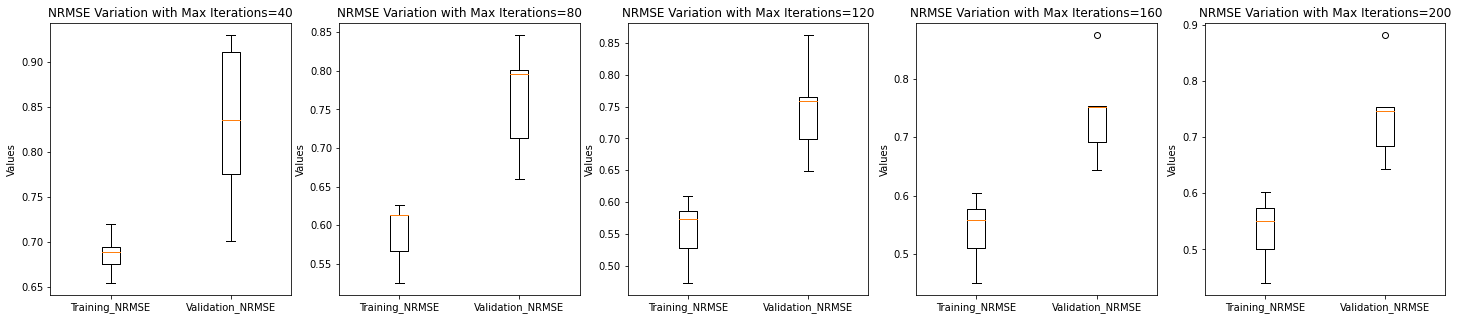

[[0.6550908722154634, 0.6888367904364502, 0.6752077357881212, 0.6946406616332137, 0.7199832752027613], [0.5258184557815649, 0.6263280749494525, 0.5660994545878937, 0.6130375462966257, 0.6135235363568479], [0.4735252684152355, 0.6096602533945509, 0.5273122961239817, 0.5867558421462538, 0.5734295438113126], [0.45116472674893077, 0.6044933843290198, 0.5102146848996905, 0.5772605127389275, 0.5574396142777167], [0.4409966988780235, 0.6026185473688106, 0.5010905627376948, 0.5733041661828143, 0.5506228580910351]]
[[0.9117398073600441, 0.7007959001451687, 0.7756914411289161, 0.835932516848609, 0.9297033257904279], [0.801441427615516, 0.6593014699647878, 0.7130584180723163, 0.8458560012574986, 0.7962930692048714], [0.7647516117174558, 0.6484727518565228, 0.6985815632952982, 0.862019911392076, 0.758662834490982], [0.751278573023243, 0.6443634282007024, 0.6910211727233199, 0.8736858166494239, 0.7525755603686058], [0.7464445719617622, 0.6425877153679416, 0.6847955221793902, 0.8812672382743657, 0.7

In [101]:
# updated for multiple plots

# we begin by creating empty arrays to store results for the Box Plots
Training_NRMSE = []
Validation_NRMSE = []
i=2 #
while(i<11):  
  j=0
  temp_train_nrmse=[]
  temp_val_nrmse=[]
  while(j<5):
    np.random.seed(21+j)
    # generate random data matrix & target vector for training
    Training_X = Random_Data_Matrix(100,9)
    w = np.random.normal(0,1,Training_X.shape[1])
    Training_t = Target(Training_X, w, w0=1.5, Var=0.34)
    x0=np.ones(Training_X.shape[0])
    Training_X1 = np.column_stack((x0, Training_X))

    # generate the validation data
    Validation_X = Random_Data_Matrix(20,9)
    #w = np.random.normal(0,1,Validation_X.shape[1])
    Validation_t = Target(Validation_X, w, w0=1.5, Var=0.34)
    x0=np.ones(Validation_X.shape[0])
    Validation_X1 = np.column_stack((x0, Validation_X))
    
    # call pre-defined gradient descent function with different vals of max iterations
    # store the Training_NRMSE in the list 
    w, T_NRMSE = LR_Weights_Gradient_Descent(Training_X1, Training_t, l2=0.3, l1=0.4, eta=0.001, max_iter=20*i, min_change_NRMSE=1e-7)

    temp_train_nrmse.append(T_NRMSE)
    # using the w from training compute target in validation set
    y=Validation_X1@w
    # compute MSE
    V_MSE=Mean_Square_Error(y,Validation_t)
    # store the validation_NRMSE in the list
    
    temp_val_nrmse.append(np.sqrt(V_MSE)/np.std(Validation_t))
    #Validation_NRMSE[i]=np.sqrt(V_MSE)/np.std(Validation_t)
    j=j+1
  Training_NRMSE.append(temp_train_nrmse)
  #print(Training_NRMSE)
  Validation_NRMSE.append(temp_val_nrmse)
  i=i+2
# now the box plot can be plotted with values from 'Training_NRMSE', 'Validation_NRMSE'
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5, figsize=(25, 5))

# create a box plot with the values in the 'Training_NRMSE', 'Validation_NRMSE' lists
bp = ax1.boxplot([Training_NRMSE[0], Validation_NRMSE[0]], labels=['Training_NRMSE', 'Validation_NRMSE'])
ax1.set_title('NRMSE Variation with Max Iterations=40')
ax1.set_ylabel('Values')

bp = ax2.boxplot([Training_NRMSE[1], Validation_NRMSE[1]], labels=['Training_NRMSE', 'Validation_NRMSE'])
ax2.set_title('NRMSE Variation with Max Iterations=80')
ax2.set_ylabel('Values')

bp = ax3.boxplot([Training_NRMSE[2], Validation_NRMSE[2]], labels=['Training_NRMSE', 'Validation_NRMSE'])
ax3.set_title('NRMSE Variation with Max Iterations=120')
ax3.set_ylabel('Values')

bp = ax4.boxplot([Training_NRMSE[3], Validation_NRMSE[3]], labels=['Training_NRMSE', 'Validation_NRMSE'])
ax4.set_title('NRMSE Variation with Max Iterations=160')
ax4.set_ylabel('Values')

bp = ax5.boxplot([Training_NRMSE[4], Validation_NRMSE[4]], labels=['Training_NRMSE', 'Validation_NRMSE'])
ax5.set_title('NRMSE Variation with Max Iterations=200')
ax5.set_ylabel('Values')

# show the plots & lists of data
plt.show()
print(Training_NRMSE)
print(Validation_NRMSE)
# it can be observed that the validtion NRMSE shows more variation compared to the Training NRMSE

h) Training and validation NRMSE obtained using gradient descent with eta: Like g with appropriate changes

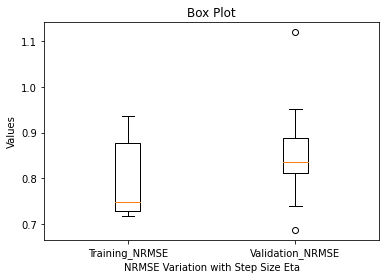

[0.92106897 0.93519349 0.90955807 0.75252062 0.7787918  0.72008974
 0.72739939 0.71660176 0.74440936 0.73241813]
[1.11961046 0.9526473  0.90111833 0.73894111 0.82321991 0.68631191
 0.80849941 0.84599485 0.85250642 0.81615782]


In [102]:
# we begin by creating the lists to store NRMSE vals for training & validation
Training_NRMSE = np.empty(11)
Validation_NRMSE = np.empty(11)
i=1
# set a random seed
np.random.seed(21)
while(i<11):
    # generate random data matrix & target vector for training    
    Training_X = Random_Data_Matrix(100,9)
    w = np.random.normal(0,1,Training_X.shape[1])
    Training_t = Target(Training_X, w, w0=0.5, Var=0.4)
    x0=np.ones(Training_X.shape[0])
    Training_X1 = np.column_stack((x0, Training_X))

    # generate the validation data
    Validation_X = Random_Data_Matrix(20,9)
    #w = np.random.normal(0,1,Validation_X.shape[1])
    Validation_t = Target(Validation_X, w, w0=0.5, Var=0.4)
    x0=np.ones(Validation_X.shape[0])
    Validation_X1 = np.column_stack((x0, Validation_X))
    
    # call pre-defined gradient descent function with different vals of eta
    # store the Training_NRMSE in the list     
    w, Training_NRMSE[i] = LR_Weights_Gradient_Descent(Training_X1, Training_t, l2=0.3, l1=0.4, eta=0.00005*i, max_iter=100, min_change_NRMSE=1e-7)

    # using the w from training compute target in validation set
    # compute MSE
    y=Validation_X1@w
    V_MSE=Mean_Square_Error(y,Validation_t)
    # store the validation_NRMSE in the list
    Validation_NRMSE[i]=np.sqrt(V_MSE)/np.std(Validation_t)
    i=i+1

fig, ax = plt.subplots()

# create a box plot with the values in the 'Training_NRMSE', 'Validation_NRMSE' lists
bp = ax.boxplot([Training_NRMSE[1:], Validation_NRMSE[1:]], labels=['Training_NRMSE', 'Validation_NRMSE'])

ax.set_title('Box Plot')
ax.set_xlabel('NRMSE Variation with Step Size Eta')
ax.set_ylabel('Values')

# the same can be observed as follows
plt.show()
print(Training_NRMSE[1:])
print(Validation_NRMSE[1:])
# it can be observed that the validtion NRMSE shows more variation compared to the Training NRMSE

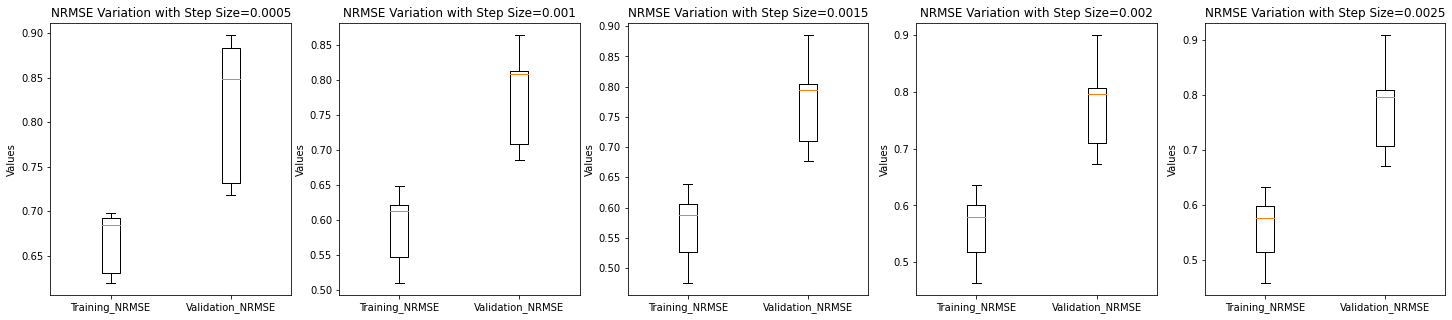

[[0.6197513115670423, 0.6924890128716604, 0.630567504979398, 0.6845175397121352, 0.6979285876821837], [0.5107529795408775, 0.6493283940127554, 0.5468386548851452, 0.6215912220599167, 0.6133287044959473], [0.4759005845713472, 0.6389299047079344, 0.5257958482179312, 0.6057467216929702, 0.5878016438674071], [0.46423674297692286, 0.6354032982199072, 0.5185393552136123, 0.6008912265095838, 0.5793975663558922], [0.45977322275236504, 0.6338305035627103, 0.515253144377337, 0.5991003041863259, 0.5763026783377847], [0.6050256682811358, 0.6331281911125597, 0.5135053166127016, 797.1737110391554, 11.154646539851306], [1342288809488.6624, 67775343626.519066, 79582.82385798, 1155273761801720.5, 25388544556145.184], [7.41862931847003e+21, 5.063927526202969e+20, 1346426897344721.5, 3.624792629137474e+24, 1.0778282615372489e+23], [6.658734073734502e+29, 5.551917242389129e+28, 2.554402913094068e+23, 2.2271478095187166e+32, 8.110966904445042e+30], [3.4926050317403183e+36, 3.357806499778288e+35, 2.26480154

In [103]:
#updated for multiple plots

# we begin by creating empty arrays to store results for the Box Plots
Training_NRMSE = []
Validation_NRMSE = []
i=10 #
while(i<110):  
  j=0
  temp_train_nrmse=[]
  temp_val_nrmse=[]
  while(j<5):
    np.random.seed(21+j)
    # generate random data matrix & target vector for training    
    Training_X = Random_Data_Matrix(100,9)
    w = np.random.normal(0,1,Training_X.shape[1])
    Training_t = Target(Training_X, w, w0=0.5, Var=0.4)
    x0=np.ones(Training_X.shape[0])
    Training_X1 = np.column_stack((x0, Training_X))

    # generate the validation data
    Validation_X = Random_Data_Matrix(20,9)
    #w = np.random.normal(0,1,Validation_X.shape[1])
    Validation_t = Target(Validation_X, w, w0=0.5, Var=0.4)
    x0=np.ones(Validation_X.shape[0])
    Validation_X1 = np.column_stack((x0, Validation_X))
    
    # call pre-defined gradient descent function with different vals of eta
    # store the Training_NRMSE in the list     
    w, T_NRMSE = LR_Weights_Gradient_Descent(Training_X1, Training_t, l2=0.3, l1=0.4, eta=0.00005*i, max_iter=100, min_change_NRMSE=1e-7)
    
    temp_train_nrmse.append(T_NRMSE)
    # using the w from training compute target in validation set
    y=Validation_X1@w
    # compute MSE
    V_MSE=Mean_Square_Error(y,Validation_t)
    # store the validation_NRMSE in the list
    
    temp_val_nrmse.append(np.sqrt(V_MSE)/np.std(Validation_t))
    #Validation_NRMSE[i]=np.sqrt(V_MSE)/np.std(Validation_t)
    j=j+1
  Training_NRMSE.append(temp_train_nrmse)
  #print(Training_NRMSE)
  Validation_NRMSE.append(temp_val_nrmse)
  i=i+10
# now the box plot can be plotted with values from 'Training_NRMSE', 'Validation_NRMSE'
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5, figsize=(25, 5))

# create a box plot with the values in the 'Training_NRMSE', 'Validation_NRMSE' lists
bp = ax1.boxplot([Training_NRMSE[0], Validation_NRMSE[0]], labels=['Training_NRMSE', 'Validation_NRMSE'])
ax1.set_title('NRMSE Variation with Step Size=0.0005')
ax1.set_ylabel('Values')

bp = ax2.boxplot([Training_NRMSE[1], Validation_NRMSE[1]], labels=['Training_NRMSE', 'Validation_NRMSE'])
ax2.set_title('NRMSE Variation with Step Size=0.001')
ax2.set_ylabel('Values')

bp = ax3.boxplot([Training_NRMSE[2], Validation_NRMSE[2]], labels=['Training_NRMSE', 'Validation_NRMSE'])
ax3.set_title('NRMSE Variation with Step Size=0.0015')
ax3.set_ylabel('Values')

bp = ax4.boxplot([Training_NRMSE[3], Validation_NRMSE[3]], labels=['Training_NRMSE', 'Validation_NRMSE'])
ax4.set_title('NRMSE Variation with Step Size=0.002')
ax4.set_ylabel('Values')

bp = ax5.boxplot([Training_NRMSE[4], Validation_NRMSE[4]], labels=['Training_NRMSE', 'Validation_NRMSE'])
ax5.set_title('NRMSE Variation with Step Size=0.0025')
ax5.set_ylabel('Values')

# show the plots & lists of data
plt.show()
print(Training_NRMSE)
print(Validation_NRMSE)
# it can be observed that the validtion NRMSE shows more variation compared to the Training NRMSE

i) Time taken to solve gradient descent with number of samples and number of variables and its breaking points

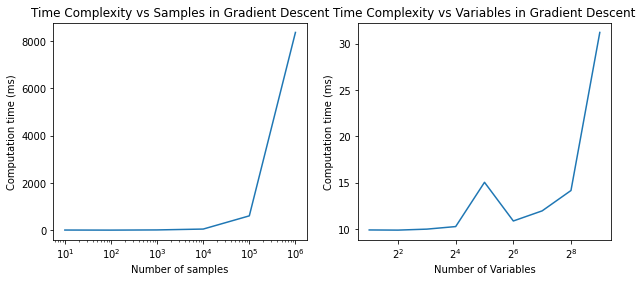

[10, 100, 1000, 10000, 100000, 1000000]
[9.545564651489258, 6.50477409362793, 14.486312866210938, 51.00512504577637, 610.1648807525635, 8369.535446166992]
[2, 4, 8, 16, 32, 64, 128, 256, 512]
[9.897708892822266, 9.88006591796875, 9.986400604248047, 10.26296615600586, 15.041112899780273, 10.866880416870117, 11.95836067199707, 14.155149459838867, 31.218528747558594]


In [104]:
# importing the time library
from time import time
# setting a random seed
np.random.seed(21)
# creating lists to store no of samples & corresponding time taken
Sample_Time_List = []
Sample_List = [10, 100, 1000, 10000, 100000,1000000]
i=10
while(i<1000001):
    # generate training data matrix & target vector
    Training_X = Random_Data_Matrix(i,9)
    w = np.random.normal(0,1,Training_X.shape[1])
    Training_t = Target(Training_X, w, w0=0.5, Var=0.4)
    x0=np.ones(Training_X.shape[0])
    Training_X1 = np.column_stack((x0, Training_X))
    
    # store starting time    
    start_time = time()
    w, Training_NRMSE = LR_Weights_Gradient_Descent(Training_X1, Training_t, l2=0.3, l1=0.4, eta=0.000001, max_iter=100, min_change_NRMSE=1e-6)
    # append the time diff in the list
    Sample_Time_List.append((time() - start_time)*10**3)
  
    i=i*10
# create 2 subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
# first subplot is bw samples & time taken on a log scale with base 10
ax1.plot(Sample_List, Sample_Time_List)
ax1.set_xscale('log')
ax1.set_xlabel('Number of samples')
ax1.set_ylabel('Computation time (ms)')
ax1.set_title('Time Complexity vs Samples in Gradient Descent')


# now the same is repeated by varying the no of variables
# begin by creating the lists to store the no of vars & te corresponding time taken
Variable_Time_List = []
Variable_List = [2, 4, 8, 16, 32, 64, 128, 256, 512]
i=2
while(i<1024):
    # generate training data matrix & target vector
    Training_X = Random_Data_Matrix(100,i)
    w = np.random.normal(0,1,Training_X.shape[1])
    Training_t = Target(Training_X, w, w0=0.5, Var=0.4)
    x0=np.ones(Training_X.shape[0])
    Training_X1 = np.column_stack((x0, Training_X))
    # note starting time    
    start_time = time()
    w, Training_NRMSE = LR_Weights_Gradient_Descent(Training_X1, Training_t, l2=0.3, l1=0.4, eta=0.000001, max_iter=100, min_change_NRMSE=1e-6)
    # call the function
    # append time diff in ms to the list    
    Variable_Time_List.append((time() - start_time)*10**3)  
    i=i*2

# second subplot is bw samples & time taken on a log scale of base 2

ax2.plot(Variable_List, Variable_Time_List)
ax2.set_xscale('log',basex=2)
ax2.set_xlabel('Number of Variables')
ax2.set_ylabel('Computation time (ms)')
ax2.set_title('Time Complexity vs Variables in Gradient Descent')

# the plots & data lists can now be printed as follows
plt.show()
print(Sample_List)
print(Sample_Time_List)
print(Variable_List)
print(Variable_Time_List)

# it can be observed that as the no of samples/variables increases the computational requiremnts increase exponentially
# the RAM is exhausted for samples in excess of 10000000 where it reaches the breakpoint which is higher than that of the Pseudo Inverse Solution

k) Training and validation NRMSE and number of nearly zero weights obtained using gradient descent with lambda2: We are looking for how L2 normalization shrink the weights. Does it make them zero? For what value of lambda? Keep w, noise_var etc. fixed.

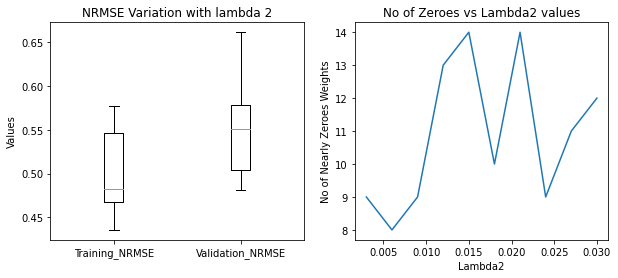

[0.45701476 0.4714189  0.43583301 0.5681103  0.57679084 0.46617333
 0.55320979 0.47235973 0.49137612 0.52681676]
[0.4955853  0.61227351 0.54514314 0.66096106 0.53131646 0.56829781
 0.58189427 0.48141572 0.49218912 0.55602715]
[9, 8, 9, 13, 14, 10, 14, 9, 11, 12]
[0.003, 0.006, 0.009000000000000001, 0.012, 0.015, 0.018000000000000002, 0.021, 0.024, 0.027, 0.03]


In [105]:
# we begin by creating the lists to store NRMSE vals for training & validation
Training_NRMSE = np.empty(11)
Validation_NRMSE = np.empty(11)
# creating another set of lists to store no of zeroes in weight vector & different values of lambda2
Lambda2_Zeroes_List = []
Lambda2_List = []
i=1
# set a random seed
np.random.seed(21)
while(i<11):
    # generate random data matrix & target vector for training    
    Training_X = Random_Data_Matrix(100,19)
    w = np.random.normal(0,1,Training_X.shape[1])
    Training_t = Target(Training_X, w, w0=0.4, Var=0.3)
    x0=np.ones(Training_X.shape[0])
    Training_X1 = np.column_stack((x0, Training_X))

    # generate the validation data
    Validation_X = Random_Data_Matrix(20,19)
    #w = np.random.normal(0,1,Validation_X.shape[1])
    Validation_t = Target(Validation_X, w, w0=0.4, Var=0.3)
    x0=np.ones(Validation_X.shape[0])
    Validation_X1 = np.column_stack((x0, Validation_X))

    # call pre-defined gradient descent function
    # store the Training_NRMSE in the list     
    w, Training_NRMSE[i] = LR_Weights_Gradient_Descent(Training_X1, Training_t, l2=0.003*i, l1=0, eta=0.0007, max_iter=100, min_change_NRMSE=1e-7)
    
    # append the no of zeroes in w to the list
    Lambda2_Zeroes_List.append(len(w) - np.count_nonzero(np.round_(w)))
    # append the current lambda2 value to the other list
    Lambda2_List.append(0.003*i)

    # using the w from training compute target in validation set
    y=Validation_X1@w
    # compute MSE
    V_MSE=Mean_Square_Error(y,Validation_t)
    # store the validation_NRMSE in the list
    Validation_NRMSE[i]=np.sqrt(V_MSE)/np.std(Validation_t)
    i=i+1

# creating two subplots ax1 & ax2
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

# create a box plot with the values in the 'Training_NRMSE', 'Validation_NRMSE' lists
bp = ax1.boxplot([Training_NRMSE[1:], Validation_NRMSE[1:]], labels=['Training_NRMSE', 'Validation_NRMSE'])
ax1.set_title('NRMSE Variation with lambda 2')
ax1.set_ylabel('Values')
 
# creating another plot with values in Lambda2_List & Lambda2_Zeroes_List on a linaer scale
ax2.plot(Lambda2_List, Lambda2_Zeroes_List)
ax2.set_xscale('linear')
ax2.set_xlabel('Lambda2')
ax2.set_ylabel('No of Nearly Zeroes Weights')
ax2.set_title('No of Zeroes vs Lambda2 values')

# show the plots & lists of data
plt.show()
print(Training_NRMSE[1:])
print(Validation_NRMSE[1:])
print(Lambda2_Zeroes_List)
print(Lambda2_List)
# it can be observed that the validtion NRMSE shows more variation compared to the Training NRMSE
# also as the value of lambda2 is increased, the number of nearly zero weights also increases 

l) Training and validation NRMSE and number of nearly zero weights obtained using gradient descent with lambda1: We are looking for how L1 normalization shrink the weights. Does it make them zero? For what value of lambda? Keep w, noise_var etc. fixed.

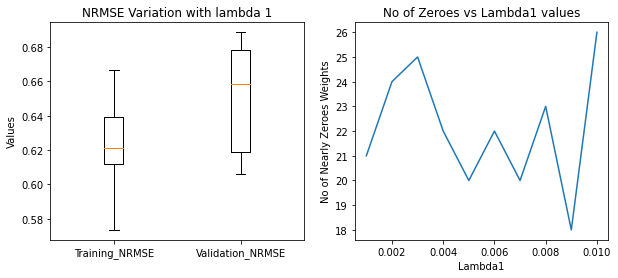

[0.59141819 0.63988506 0.61884331 0.62313223 0.6376892  0.61040675
 0.61608194 0.64753898 0.57350463 0.66673534]
[0.60820771 0.67934787 0.65251787 0.60612288 0.64463167 0.67975835
 0.67538557 0.68859578 0.61064817 0.6638699 ]
[21, 24, 25, 22, 20, 22, 20, 23, 18, 26]
[0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009000000000000001, 0.01]


In [106]:
# we begin by creating the lists to store NRMSE vals for training & validation
Training_NRMSE = np.empty(11)
Validation_NRMSE = np.empty(11)
# creating another set of lists to store no of zeroes in weight vector & different values of lambda1
Lambda1_Zeroes_List = []
Lambda1_List = []
i=1
# set a random seed
np.random.seed(21)
while(i<11):
    # generate random data matrix & target vector for training        
    Training_X = Random_Data_Matrix(500,30)
    w = np.random.normal(0,1,Training_X.shape[1])
    Training_t = Target(Training_X, w, w0=0.5, Var=0.4)
    x0=np.ones(Training_X.shape[0])
    Training_X1 = np.column_stack((x0, Training_X))
    # generate the validation data
    Validation_X = Random_Data_Matrix(50,30)
    #w = np.random.normal(0,1,Validation_X.shape[1])
    Validation_t = Target(Validation_X, w, w0=0.5, Var=0.4)
    x0=np.ones(Validation_X.shape[0])
    Validation_X1 = np.column_stack((x0, Validation_X))

    # call pre-defined gradient descent function
    # store the Training_NRMSE in the list         
    w, Training_NRMSE[i] = LR_Weights_Gradient_Descent(Training_X1, Training_t, l2=0, l1=0.001*i, eta=0.00007, max_iter=100, min_change_NRMSE=1e-7)
    # append the no of zeroes in w to the list    
    Lambda1_Zeroes_List.append(len(w) - np.count_nonzero(np.round_(w)))
    # append the current lambda1 value to the other list
    Lambda1_List.append(0.001*i)

    # using the w from training compute target in validation set
    y=Validation_X1@w
    # compute MSE
    V_MSE=Mean_Square_Error(y,Validation_t)
    # store the validation_NRMSE in the list
    Validation_NRMSE[i]=np.sqrt(V_MSE)/np.std(Validation_t)
    i=i+1

# creating two subplots ax1 & ax2
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

# create a box plot with the values in the 'Training_NRMSE', 'Validation_NRMSE' lists
bp = ax1.boxplot([Training_NRMSE[1:], Validation_NRMSE[1:]], labels=['Training_NRMSE', 'Validation_NRMSE'])
ax1.set_title('NRMSE Variation with lambda 1')
ax1.set_ylabel('Values')

# creating another plot with values in Lambda1_List & Lambda1_Zeroes_List on a linaer scale
ax2.plot(Lambda1_List, Lambda1_Zeroes_List)
ax2.set_xscale('linear')
ax2.set_xlabel('Lambda1')
ax2.set_ylabel('No of Nearly Zeroes Weights')
ax2.set_title('No of Zeroes vs Lambda1 values')

# show the plots & lists of data
plt.show()
print(Training_NRMSE[1:])
print(Validation_NRMSE[1:])
print(Lambda1_Zeroes_List)
print(Lambda1_List)
# it can be observed that the validtion NRMSE shows more variation compared to the Training NRMSE
# also as the value of lambda1 is increased, the number of nearly zero weights also increases
# and the number of nearly zero weights obtained in l1 is more than that of l2

m) Training and validation NRMSE for optimal lambda2 with noise variance: Keep w and everything else fixed, except noise variance

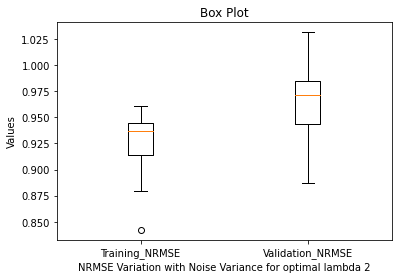

[0.84223773 0.87907769 0.91130399 0.94178898 0.95140299 0.92245419
 0.94531116 0.93274771 0.94151438 0.96077548]
[0.887079   1.03128842 0.97826483 0.97100154 0.93674435 1.00031266
 0.96570523 0.98745325 0.93684608 0.9725635 ]


In [107]:
# using l2=0.07 as optimal values of lambda2, the NRMSE variation is obserevd in this question
# we begin by creating the lists to store NRMSE vals for training & validation
Training_NRMSE = np.empty(11)
Validation_NRMSE = np.empty(11)
i=1
# set a random seed
np.random.seed(21)
while(i<11):
    # generate random data matrix & target vector for training        
    Training_X = Random_Data_Matrix(100,19)
    w = np.random.normal(0,1,Training_X.shape[1])
    Training_t = Target(Training_X, w, w0=0.5, Var=0.5*i)
    x0=np.ones(Training_X.shape[0])
    Training_X1 = np.column_stack((x0, Training_X))
    # generate the validation data
    Validation_X = Random_Data_Matrix(20,19)
    #w = np.random.normal(0,1,Validation_X.shape[1])
    Validation_t = Target(Validation_X, w, w0=0.5, Var=0.5*i)
    x0=np.ones(Validation_X.shape[0])
    Validation_X1 = np.column_stack((x0, Validation_X))

    # call pre-defined gradient descent function
    # store the Training_NRMSE in the list     
    w, Training_NRMSE[i] = LR_Weights_Gradient_Descent(Training_X1, Training_t, l2=0.07, l1=0.04, eta=0.0001, max_iter=100, min_change_NRMSE=1e-7)
    # using the w from training compute target in validation set
    # compute MSE
    y=Validation_X1@w
    V_MSE=Mean_Square_Error(y,Validation_t)

    # store the validation_NRMSE in the list
    Validation_NRMSE[i]=np.sqrt(V_MSE)/np.std(Validation_t)
    i=i+1

# create a box plot with the values in the 'Training_NRMSE', 'Validation_NRMSE' lists
fig, ax = plt.subplots()
bp = ax.boxplot([Training_NRMSE[1:], Validation_NRMSE[1:]], labels=['Training_NRMSE', 'Validation_NRMSE'])
ax.set_title('Box Plot')
ax.set_xlabel('NRMSE Variation with Noise Variance for optimal lambda 2')
ax.set_ylabel('Values')

# visualise the box plots bw Training & Validation NRMSE
plt.show()
print(Training_NRMSE[1:])
print(Validation_NRMSE[1:])
# it can be observed that the validtion NRMSE shows more variation compared to the Training NRMSE
# also as noise is increased the validation NRMSE is reduced

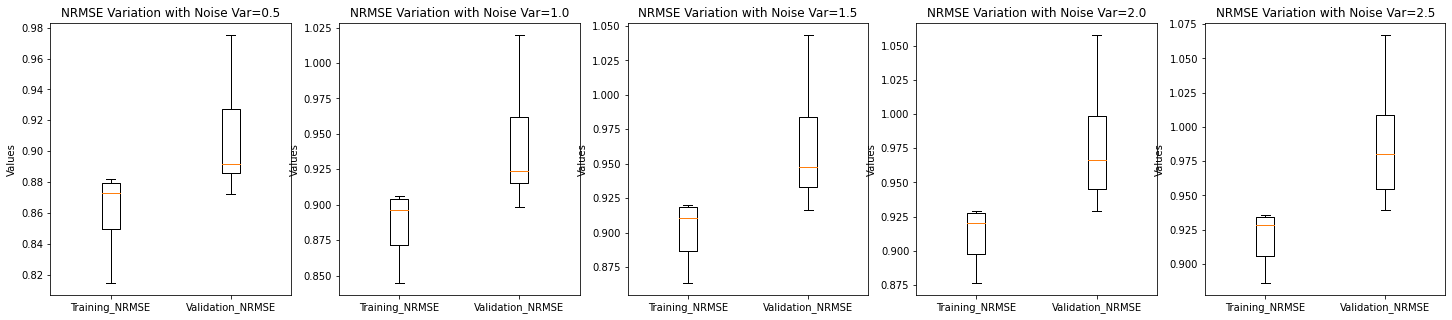

[[0.8422238330676973, 0.8814219607509525, 0.8820004997084582, 0.8721337707262804, 0.8732436154772093, 0.8149144108697045], [0.8641009470029771, 0.9058215933452719, 0.906371042849558, 0.8982275814155675, 0.8940350443506904, 0.8450562693699621], [0.8794350446826743, 0.9198529277666025, 0.920370798968024, 0.9135848065195717, 0.9077683769708127, 0.8638318507960558], [0.890803891901793, 0.9290368162991284, 0.9294050030526434, 0.9237783452819364, 0.917608365485585, 0.8768228285219009], [0.8995674124334657, 0.9355510475457124, 0.9356833866426659, 0.9310641891693273, 0.9250415058026902, 0.886419467806118]]
[[0.887127399698127, 0.9379954564226426, 0.9750018042795966, 0.8723827213518948, 0.8964622092890219, 0.8852136892048432], [0.9146954598927725, 0.9729026490270872, 1.0194680510483067, 0.8980336981815704, 0.9167585282119574, 0.9302217042150673], [0.9366510195413122, 0.9925383133034897, 1.0431189078668, 0.9162247393355036, 0.9315074930089845, 0.9590304653791437], [0.9540404901467275, 1.00508150

In [108]:
# updated for multiple plots with diff random seeds

# using l2=0.07 as optimal values of lambda2, the NRMSE variation is obserevd in this question
# we begin by creating the lists to store NRMSE vals for training & validation

Training_NRMSE = []
Validation_NRMSE = []
i=1 #
while(i<6):  
  j=0
  temp_train_nrmse=[]
  temp_val_nrmse=[]
  while(j<6):
    np.random.seed(21+j)
    # generate random data matrix & target vector for training        
    Training_X = Random_Data_Matrix(100,19)
    w = np.random.normal(0,1,Training_X.shape[1])
    Training_t = Target(Training_X, w, w0=0.5, Var=0.5*i)
    x0=np.ones(Training_X.shape[0])
    Training_X1 = np.column_stack((x0, Training_X))
    # generate the validation data
    Validation_X = Random_Data_Matrix(20,19)
    #w = np.random.normal(0,1,Validation_X.shape[1])
    Validation_t = Target(Validation_X, w, w0=0.5, Var=0.5*i)
    x0=np.ones(Validation_X.shape[0])
    Validation_X1 = np.column_stack((x0, Validation_X))

    # call pre-defined gradient descent function
    # store the Training_NRMSE in the list     
    w, T_NRMSE = LR_Weights_Gradient_Descent(Training_X1, Training_t, l2=0.07, l1=0, eta=0.0001, max_iter=100, min_change_NRMSE=1e-7)
           
    temp_train_nrmse.append(T_NRMSE)
    # using the w from training compute target in validation set
    y=Validation_X1@w
    # compute MSE
    V_MSE=Mean_Square_Error(y,Validation_t)
    # store the validation_NRMSE in the list
    
    temp_val_nrmse.append(np.sqrt(V_MSE)/np.std(Validation_t))
    #Validation_NRMSE[i]=np.sqrt(V_MSE)/np.std(Validation_t)
    j=j+1
  Training_NRMSE.append(temp_train_nrmse)
  #print(Training_NRMSE)
  Validation_NRMSE.append(temp_val_nrmse)
  i=i+1
# now the box plot can be plotted with values from 'Training_NRMSE', 'Validation_NRMSE'
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5, figsize=(25, 5))

# create a box plot with the values in the 'Training_NRMSE', 'Validation_NRMSE' lists
bp = ax1.boxplot([Training_NRMSE[0], Validation_NRMSE[0]], labels=['Training_NRMSE', 'Validation_NRMSE'])
ax1.set_title('NRMSE Variation with Noise Var=0.5')
ax1.set_ylabel('Values')

bp = ax2.boxplot([Training_NRMSE[1], Validation_NRMSE[1]], labels=['Training_NRMSE', 'Validation_NRMSE'])
ax2.set_title('NRMSE Variation with Noise Var=1.0')
ax2.set_ylabel('Values')

bp = ax3.boxplot([Training_NRMSE[2], Validation_NRMSE[2]], labels=['Training_NRMSE', 'Validation_NRMSE'])
ax3.set_title('NRMSE Variation with Noise Var=1.5')
ax3.set_ylabel('Values')

bp = ax4.boxplot([Training_NRMSE[3], Validation_NRMSE[3]], labels=['Training_NRMSE', 'Validation_NRMSE'])
ax4.set_title('NRMSE Variation with Noise Var=2.0')
ax4.set_ylabel('Values')

bp = ax5.boxplot([Training_NRMSE[4], Validation_NRMSE[4]], labels=['Training_NRMSE', 'Validation_NRMSE'])
ax5.set_title('NRMSE Variation with Noise Var=2.5')
ax5.set_ylabel('Values')

# show the plots & lists of data
plt.show()
print(Training_NRMSE)
print(Validation_NRMSE)
# it can be observed that the validtion NRMSE shows more variation compared to the Training NRMSE
# as noise increase NRMSE also increases

n) Training and validation NRMSE for optimal lambda1 with noise variance: Keep w and everything else fixed, except noise variance

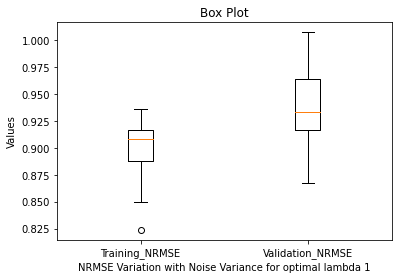

[0.82368084 0.84942607 0.88800344 0.9145323  0.92559959 0.88836259
 0.91637734 0.90134921 0.9168505  0.93585225]
[0.86769686 1.00753665 0.98248716 0.94928362 0.91445708 0.96923337
 0.92260627 0.92217818 0.91215567 0.94452496]


In [109]:
# using l1=0.07 as optimal values of lambda2, the NRMSE variation is obserevd in this question
# we begin by creating the lists to store NRMSE vals for training & validation
Training_NRMSE = np.empty(11)
Validation_NRMSE = np.empty(11)
i=1
# set a random seed
np.random.seed(21)
while(i<11):
    # generate random data matrix & target vector for training            
    Training_X = Random_Data_Matrix(100,19)
    w = np.random.normal(0,1,Training_X.shape[1])
    Training_t = Target(Training_X, w, w0=0.5, Var=0.2*i)
    x0=np.ones(Training_X.shape[0])
    Training_X1 = np.column_stack((x0, Training_X))
    # generate the validation data
    Validation_X = Random_Data_Matrix(20,19)
    #w = np.random.normal(0,1,Validation_X.shape[1])
    Validation_t = Target(Validation_X, w, w0=0.5, Var=0.2*i)
    x0=np.ones(Validation_X.shape[0])
    Validation_X1 = np.column_stack((x0, Validation_X))

    # call pre-defined gradient descent function
    # store the Training_NRMSE in the list     
    w, Training_NRMSE[i] = LR_Weights_Gradient_Descent(Training_X1, Training_t, l2=0.04, l1=0.07, eta=0.0001, max_iter=100, min_change_NRMSE=1e-7)
    # using the w from training compute target in validation set
    # compute MSE
    y=Validation_X1@w
    V_MSE=Mean_Square_Error(y,Validation_t)
    # store the validation_NRMSE in the list
    Validation_NRMSE[i]=np.sqrt(V_MSE)/np.std(Validation_t)
    i=i+1

# create a box plot with the values in the 'Training_NRMSE', 'Validation_NRMSE' lists
fig, ax = plt.subplots()
bp = ax.boxplot([Training_NRMSE[1:], Validation_NRMSE[1:]], labels=['Training_NRMSE', 'Validation_NRMSE'])
ax.set_title('Box Plot')
ax.set_xlabel('NRMSE Variation with Noise Variance for optimal lambda 1')
ax.set_ylabel('Values')

# visualise the box plots bw Training & Validation NRMSE
plt.show()
print(Training_NRMSE[1:])
print(Validation_NRMSE[1:])
# it can be observed that the validtion NRMSE shows more variation compared to the Training NRMSE
# also as noise is increased the validation NRMSE is reduced

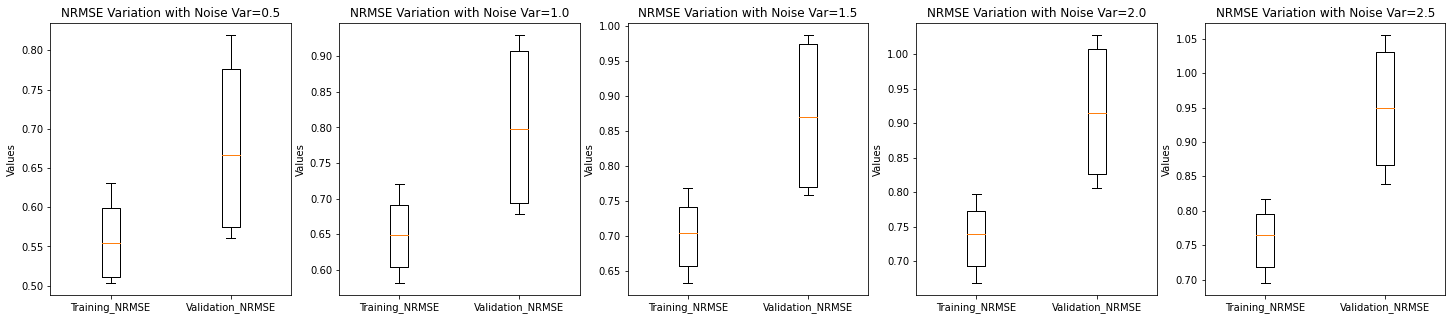

[[0.504760827385085, 0.6302821769193515, 0.6061405564074018, 0.5792566038494498, 0.530707565488168, 0.5040496295343443], [0.582349374390106, 0.7208824200988533, 0.6966340000971126, 0.675444017377361, 0.6235743878274785, 0.5968600290175565], [0.6329019783300389, 0.7681331271187761, 0.7459738353074088, 0.7280430887567185, 0.6794742183503365, 0.6497574768686304], [0.6687955814493401, 0.7975203949999594, 0.7771185698234612, 0.761731177826337, 0.7175266212115831, 0.6847232152033826], [0.6956998884039453, 0.8176920057456158, 0.7985575034260748, 0.7853213707101141, 0.7453465584033147, 0.7098292348312988]]
[[0.5607352297732933, 0.8188865546073778, 0.7866611498202172, 0.5701075440086819, 0.5882535004521428, 0.7455894540534703], [0.6784764169498988, 0.9290088431394696, 0.9176219755797996, 0.6868121924291625, 0.7178460670168774, 0.8767579524164927], [0.7618990553656714, 0.9815361992867675, 0.9860264365327528, 0.7578288528933845, 0.7895826963545596, 0.950011128296346], [0.8234881555428432, 1.01209

In [110]:
# updated for multiple values of random seed

# using l1=0.09 as optimal values of lambda2, the NRMSE variation is obserevd in this question
# we begin by creating the lists to store NRMSE vals for training & validation

Training_NRMSE = []
Validation_NRMSE = []
i=1 #
while(i<6):  
  j=0
  temp_train_nrmse=[]
  temp_val_nrmse=[]
  while(j<6):
    np.random.seed(21+j)
    # generate random data matrix & target vector for training            
    Training_X = Random_Data_Matrix(100,19)
    w = np.random.normal(0,1,Training_X.shape[1])
    Training_t = Target(Training_X, w, w0=0.5, Var=0.5*i)
    x0=np.ones(Training_X.shape[0])
    Training_X1 = np.column_stack((x0, Training_X))
    # generate the validation data
    Validation_X = Random_Data_Matrix(20,19)
    #w = np.random.normal(0,1,Validation_X.shape[1])
    Validation_t = Target(Validation_X, w, w0=0.5, Var=0.5*i)
    x0=np.ones(Validation_X.shape[0])
    Validation_X1 = np.column_stack((x0, Validation_X))

    # call pre-defined gradient descent function
    # store the Training_NRMSE in the list     
    w, T_NRMSE = LR_Weights_Gradient_Descent(Training_X1, Training_t, l2=0.04, l1=0.09, eta=0.0007, max_iter=100, min_change_NRMSE=1e-7)
        
    temp_train_nrmse.append(T_NRMSE)
    # using the w from training compute target in validation set
    y=Validation_X1@w
    # compute MSE
    V_MSE=Mean_Square_Error(y,Validation_t)
    # store the validation_NRMSE in the list
    
    temp_val_nrmse.append(np.sqrt(V_MSE)/np.std(Validation_t))
    #Validation_NRMSE[i]=np.sqrt(V_MSE)/np.std(Validation_t)
    j=j+1
  Training_NRMSE.append(temp_train_nrmse)
  #print(Training_NRMSE)
  Validation_NRMSE.append(temp_val_nrmse)
  i=i+1
# now the box plot can be plotted with values from 'Training_NRMSE', 'Validation_NRMSE'
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5, figsize=(25, 5))

# create a box plot with the values in the 'Training_NRMSE', 'Validation_NRMSE' lists
bp = ax1.boxplot([Training_NRMSE[0], Validation_NRMSE[0]], labels=['Training_NRMSE', 'Validation_NRMSE'])
ax1.set_title('NRMSE Variation with Noise Var=0.5')
ax1.set_ylabel('Values')

bp = ax2.boxplot([Training_NRMSE[1], Validation_NRMSE[1]], labels=['Training_NRMSE', 'Validation_NRMSE'])
ax2.set_title('NRMSE Variation with Noise Var=1.0')
ax2.set_ylabel('Values')

bp = ax3.boxplot([Training_NRMSE[2], Validation_NRMSE[2]], labels=['Training_NRMSE', 'Validation_NRMSE'])
ax3.set_title('NRMSE Variation with Noise Var=1.5')
ax3.set_ylabel('Values')

bp = ax4.boxplot([Training_NRMSE[3], Validation_NRMSE[3]], labels=['Training_NRMSE', 'Validation_NRMSE'])
ax4.set_title('NRMSE Variation with Noise Var=2.0')
ax4.set_ylabel('Values')

bp = ax5.boxplot([Training_NRMSE[4], Validation_NRMSE[4]], labels=['Training_NRMSE', 'Validation_NRMSE'])
ax5.set_title('NRMSE Variation with Noise Var=2.5')
ax5.set_ylabel('Values')

# show the plots & lists of data
plt.show()
print(Training_NRMSE)
print(Validation_NRMSE)
# it can be observed that the validtion NRMSE shows more variation compared to the Training NRMSE
# as noise increase NRMSE also increases

14. Write your overall learning points by doing entire assignment.


i) It can be observed that as the no of samples/variables increases the computational requiremnts increase exponentially

ii) The RAM is exhausted for samples in excess of 1000000 where it reaches the breakpoint for pseudo inverse solution.

iii) Also for gradiemt descent the RAM is exhausted for samples in excess of 10000000 where it reaches the breakpoint which is higher than that of the Pseudo Inverse solution.

iv) The validtion NRMSE shows more variation compared to the Training NRMSE

v) As the value of lambda1 is increased, the number of nearly zero weights also increases

vi) The number of nearly zero weights obtained in l1 is more than that of l2 as l1 produces a more sparser weight vector

vii) It can be observed that the validtion NRMSE shows more variation compared to the Training NRMSE & as noise variance is increased the validation NRMSE is reduced.



15. Quote your references, including roll numbers of fellow students with whom you discussed. Be specific about which part was inspired by what source or which friend.

Fellow Students with whom I discused the assignmnet

Debasmit Dey 22D0519

Sources and References consulted for completion of the assignment

Box Plots
https://www.coursera.org/learn/python-for-data-visualization/lecture/u9PzD/box-plots

Linear Regression
https://medium.com/geekculture/linear-regression-gradient-descent-model-regularization-fba0e2c1e4a7

Regularisation 
https://towardsdatascience.com/intuitions-on-l1-and-l2-regularisation-235f2db4c261

Arrays
https://www.geeksforgeeks.org/python-initialize-empty-array-of-given-length/

Logarithmic Scale
https://www.geeksforgeeks.org/how-to-plot-logarithmic-axes-in-matplotlib/

Norms
https://towardsdatascience.com/intuitions-on-l1-and-l2-regularisation-235f2db4c261

Linear Regression Solution
https://www.statisticshowto.com/probability-and-statistics/regression-analysis/find-a-linear-regression-equation/